# **上海2022疫情项目**

Below is the link of our colab notebook：https://colab.research.google.com/drive/17LWi6y8eSElqQjNz95TgN4XjW--lh7cF?usp=sharing

In [ ]:
# Install Colorama

!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import packages

# data processing
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import re

# data visualization
import plotly.graph_objs as go
from plotly.graph_objs import Bar, Layout
from plotly import offline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

# change text color
import colorama
from colorama import Fore, Style

### **第一阶段：数据梳理**

近日来，中国疫情卷土重来，上海前所未有的严重疫情牵动着全国人民的心。我们希望能够通过Python对中国各省疫情的时间序列进行数据分析、建模及预测。


#### **时间序列的定义**

时间序列，是指同一个变量在连续且固定的时间间隔上的各个数据点的集合(比如每5分钟记录的收费口车流量，或者每年记录的药物销量都是时间序列)。

**数据获取**

首先，我们要获取时间序列数据：

- time_series_covid19_confirmed_US.csv
- time_series_covid19_confirmed_global.csv
- time_series_covid19_deaths_US.csv
- time_series_covid19_deaths_global.csv
- time_series_covid19_recovered_global.csv

In [ ]:
def GET_csse_covid_19_time_series():

    print('Reading Time Series Data......')
    repo = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

    ts_confirmed_us = pd.read_csv(repo+'time_series_covid19_confirmed_US.csv')
    ts_confirmed_global = pd.read_csv(repo+'time_series_covid19_confirmed_global.csv')

    ts_deaths_us = pd.read_csv(repo+'time_series_covid19_deaths_US.csv')
    ts_deaths_global = pd.read_csv(repo+'time_series_covid19_deaths_global.csv')

    ts_recovered_global = pd.read_csv(repo+'time_series_covid19_recovered_global.csv')

    print('Reading Finished')
    return ts_confirmed_us,ts_confirmed_global,ts_deaths_us,ts_deaths_global,ts_recovered_global

In [ ]:
ts_confirmed_us,ts_confirmed_global,ts_deaths_us,ts_deaths_global,ts_recovered_global = GET_csse_covid_19_time_series()

Reading Time Series Data......
Reading Finished


然后，我们要获取横截面数据：

- csse_covid_19_daily_reports
- csse_covid_19_daily_reports_us

In [ ]:
def GET_csse_covid_19_daily_reports():

    print('Reading Cross-Sectional Data......')

    # global
    ts_confirmed_us = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')

    latest = pd.to_datetime(ts_confirmed_us.columns[-1]).strftime('%m-%d-%Y')
    prev = (pd.to_datetime(ts_confirmed_us.columns[-1])+timedelta(-1)).strftime('%m-%d-%Y')
    url_latest_global = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{latest}.csv'
    latest_data_global = pd.read_csv(url_latest_global)
    

    url_prev_global = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{prev}.csv'
    prev_data_global = pd.read_csv(url_prev_global)

    url_latest_us = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/{latest}.csv'
    latest_data_us = pd.read_csv(url_latest_us)

    url_prev_us = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/{prev}.csv'
    prev_data_us = pd.read_csv(url_prev_us)


    print('Reading Finished')
    return latest_data_global,prev_data_global,latest_data_us,prev_data_us

In [ ]:
latest_data_global,prev_data_global,latest_data_us,prev_data_us = GET_csse_covid_19_daily_reports()

Reading Cross-Sectional Data......
Reading Finished


In [ ]:
# Change the Font to Chinese because there is Chinese Font in matplotlib

!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager 

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-03-21 10:17:36--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.163.101, 142.251.163.113, 142.251.163.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.163.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lgqipjv0vnvbed3t6dv9a9npep5hugto/1679393850000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=1ee59552-6dd0-4e71-a877-32f0f99ccb2d [following]
--2023-03-21 10:17:37--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lgqipjv0vnvbed3t6dv9a9npep5hugto/1679393850000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=1ee59552-6dd0-4e71-a877-32f0f99ccb2d
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.16.132, 2607:f8b0:4004:c17::84
Connecting to do

In [ ]:
def GET_shanghai_data(plot = True, encoding = "UTF-8"):

    import re
    print('Processing Data (data from Shanghai Health Commission)......')
    url = f'https://raw.githubusercontent.com/datoujinggzj/WhalePkg/master/DATA/ts_shanghai_covid.csv'
    data = pd.read_csv(url,encoding = encoding)['detail']
    print('Reading Finished')

    data = data[data.apply(lambda x: x.startswith('上海202'))].sort_values()
    data = data.apply(lambda x: re.sub(r'\（.*?\）', '', x))  # 取数字
    data = data.apply(lambda x: x.replace('无新增','0'))

    df_all = pd.DataFrame(map(np.ravel,data.apply(lambda x: re.findall(r"\d+",x)))).rename({
        0:'年',
        1:'月',
        2:'日',
        3:'新增本土确诊',
        4:'新增本土无症状'
    },axis=1).iloc[:,:5]
    df_all['日期'] = df_all['年'].map(str)+"/"+df_all['月'].map(str)+"/"+df_all['日'].map(str)
    df_all['日期'] = pd.to_datetime(df_all['日期'])

    df_all = df_all.set_index('日期').sort_index()
    df_all = df_all.astype('int32')
    df = df_all.iloc[:,3:5]

    if plot:
        fig, axes = plt.subplots(nrows=2, ncols=1,figsize = [10,5*2])
        df_2022 = df[df.index>'2022-01-01']
        for col,ax in zip(df_2022.columns,axes):
            ax.step(df_2022.index, df_2022[col], color = '#202124',linewidth = 2)
            ax.bar(df_2022.index, df_2022[col],alpha = .8)
            ax.vlines(x=pd.to_datetime("2022-04-01"), ymin=0, ymax=df[col].max(), linewidth=2, color = '#4b7ffc', linestyle = '--')
            ax.vlines(x=pd.to_datetime("2022-06-01"), ymin=0, ymax=df[col].max(), linewidth=2, color = '#4b7ffc', linestyle = '--')

            ax.hlines(y=df[col].max(), xmin=df_2022.index[0], xmax=df_2022.index[-1], linewidth=1, color = '#ff0000')
            ax.text(x = df_2022.index[0], s=df[col].max(),y = df[col].max(), color = 'black', fontsize = 14)
            ax.text(x = df_2022.index[0], s=f"峰值：时间：{str(df.index[df[col].argmax()])} \n新增：{df[col].max()}例",y = df[col].max()/2, color = '#ff0000', fontsize = 18)
            ax.text(x = df_2022.index[0], s=f"今日：时间：{str(df.index[-1])} \n新增：{df[col][-1]}例",y = df[col].max()/4, color = '#ff0000', fontsize = 18)

            ax.text(x = pd.to_datetime("2022-03-15"), s="\n2022年4月1日",y = df[col].max()*2/3, color = 'black', fontsize = 12)
            ax.text(x = pd.to_datetime("2022-05-15"), s="\n2022年6月1日",y = df[col].max()*2/3, color = 'black', fontsize = 12)

            ax.set_xlabel('日期')
            ax.set_ylabel(f'{col}数')
            ax.set_title(f'{col}时间序列趋势图')

        plt.tight_layout()

    return df

Processing Data (data from Shanghai Health Commission)......
Reading Finished


新增本土确诊  新增本土无症状
日期                         
2021-01-01       0        4
2021-01-02       0        6
2021-01-03       0        4
2021-01-04       0        6
2021-01-05       0        2
...            ...      ...
2022-06-07       4       11
2022-06-08       4        5
2022-06-09       6        5
2022-06-10       7        9
2022-06-11      10       19

[503 rows x 2 columns]

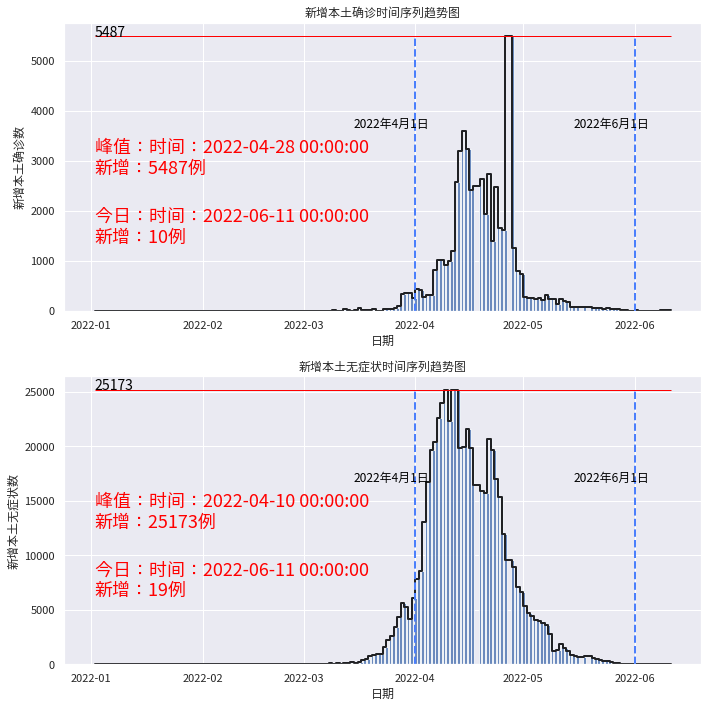

In [ ]:
# Get the Covid data of Shanghai

GET_shanghai_data(plot = True)

In [ ]:
# data processing
import pandas as pd
import numpy as np
from datetime import timedelta, datetime

# data visualization
import plotly.graph_objs as go
from plotly.graph_objs import Bar, Layout
from plotly import offline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

# change text color
import colorama
from colorama import Fore, Style

def GET_csse_covid_19_time_series():


    print('Reading Time Series Data......')
    repo = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

    ts_confirmed_us = pd.read_csv(repo+'time_series_covid19_confirmed_US.csv')
    ts_confirmed_global = pd.read_csv(repo+'time_series_covid19_confirmed_global.csv')

    ts_deaths_us = pd.read_csv(repo+'time_series_covid19_deaths_US.csv')
    ts_deaths_global = pd.read_csv(repo+'time_series_covid19_deaths_global.csv')

    ts_recovered_global = pd.read_csv(repo+'time_series_covid19_recovered_global.csv')


    print('Reading Finished')
    return ts_confirmed_us,ts_confirmed_global,ts_deaths_us,ts_deaths_global,ts_recovered_global

def GET_csse_covid_19_daily_reports():

    print('Reading Cross-Sectional Data......')

    # global
    ts_confirmed_us = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')

    latest = pd.to_datetime(ts_confirmed_us.columns[-1]).strftime('%m-%d-%Y')
    prev = (pd.to_datetime(ts_confirmed_us.columns[-1])+timedelta(-1)).strftime('%m-%d-%Y')

    url_latest_global = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{latest}.csv'
    latest_data_global = pd.read_csv(url_latest_global)

    url_prev_global = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{prev}.csv'
    prev_data_global = pd.read_csv(url_prev_global)

    url_latest_us = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/{latest}.csv'
    latest_data_us = pd.read_csv(url_latest_us)

    url_prev_us = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/{prev}.csv'
    prev_data_us = pd.read_csv(url_prev_us)


    print('Reading Finished')
    return latest_data_global,prev_data_global,latest_data_us,prev_data_us

def GET_shanghai_data(data_name = 'ts_shanghai_covid', plot = False):

    import re
    print('Processing Data (data from Shanghai Health Commission)......')
    url = f'https://raw.githubusercontent.com/datoujinggzj/WhalePkg/master/DATA/ts_shanghai_covid.csv'
    data = pd.read_csv(url,encoding = 'utf-8')['detail']
    print('Reading Finished')
    
    data = data[data.apply(lambda x: x.startswith('上海202'))].sort_values()
    data = data.apply(lambda x: re.sub(r'\（.*?\）', '', x))
    data = data.apply(lambda x: x.replace('无新增','0'))
    
    df_all = pd.DataFrame(map(np.ravel,data.apply(lambda x: re.findall(r"\d+",x)))).rename({
    0:'年',
    1:'月',
    2:'日',
    3:'新增本土确诊',
    4:'新增本土无症状'
    },axis=1).iloc[:,:5]
    df_all['日期'] = df_all['年'].map(str)+"/"+df_all['月'].map(str)+"/"+df_all['日'].map(str)
    df_all['日期'] = pd.to_datetime(df_all['日期'])
    
    df_all = df_all.set_index('日期').sort_index()
    df_all = df_all.astype('int32')
    df = df_all.iloc[:,3:5]
    
    if plot:
        fig, axes = plt.subplots(nrows=2, ncols=1,figsize = [10,5*2])
        df_2022 = df[df.index>'2022-01-01']
        for col,ax in zip(df_2022.columns,axes):
            ax.step(df_2022.index, df_2022[col], color = '#202124',linewidth = 2)
            ax.bar(df_2022.index, df_2022[col],alpha = .8)
            ax.hlines(y=df[col].max(), xmin=df_2022.index[0], xmax=df_2022.index[-1], linewidth=1, color = '#ff0000')
            ax.text(x = df_2022.index[0], s=df[col].max(),y = df[col].max(), color = 'black', fontsize = 14)
            ax.text(x = df_2022.index[0], s=f"峰值：时间：{str(df.index[df['新增本土确诊'].argmax()])} 新增：{df[col].max()}例",y = df[col].max()/2, color = '#ff0000', fontsize = 18)
            ax.text(x = df_2022.index[0], s=f"今日：时间：{str(df.index[-1])} 新增：{df[col][-1]}例",y = df[col].max()/3, color = '#ff0000', fontsize = 18)
            ax.set_xlabel('日期')
            ax.set_ylabel(f'{col}数')
            ax.set_title(f'{col}时间序列趋势图',fontsize = 16)

        plt.tight_layout()
        
    return df

Reading Cross-Sectional Data......
Reading Finished
Reading Time Series Data......
Reading Finished
Processing Data (data from Shanghai Health Commission)......
Reading Finished


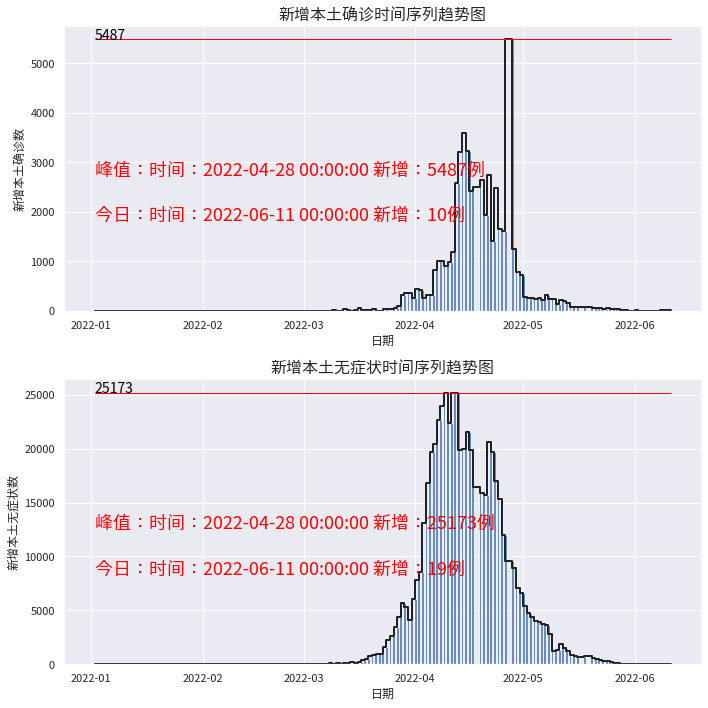

In [ ]:
# The trend of new cases in Shanghai

latest_data_global,prev_data_global,latest_data_us,prev_data_us = GET_csse_covid_19_daily_reports()
ts_confirmed_us,ts_confirmed_global,ts_deaths_us,ts_deaths_global,ts_recovered_global = GET_csse_covid_19_time_series()
ts_shanghai_covid = GET_shanghai_data(data_name = 'ts_shanghai_covid', plot=True)

In [ ]:
# We can firstly see the international time series data: ts_confirmed_global.

ts_confirmed_global.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  209390  209406  209436  209451  209451  
1  334427  334427  334427  334427  334443  334457  
2  271469  271477  271477  271490  271494  271496  
3   47875   47875   47875   47875   47890   47890  
4  105277  105277  105277  105277  105288  105288  

[5 rows x 1147 columns]

### **第二阶段：数据预处理**

#### **中国时序数据处理**

In [ ]:
# Data Processsing by Country/Region for China


data1 = ts_confirmed_global.copy()
# （1）Country/Region筛选出China的所有数据
data1 = data1[data1['Country/Region'] == 'China']
# （2）把Province/State设置成index
data1 = data1.set_index('Province/State')
# （3）'Country/Region','Lat','Long' 去除这三列，我们暂时不要。
data1 = data1.drop(['Country/Region','Lat','Long'],axis=1)
# （4）通过累计数计算新增数，也就是横着看，后一天的减去前一天的

### 1. axis=1 表示横着减
### 2. fillna 是因为后面的减去前一个，那么第一个值就会变成NaN，所以需要填充，我们填充为第一列本来的值即可
### 3. 在填充之后，为了保留原始数据类型，省着你用.astype再去转换，这里用downcast = 'infer'，具体见下方视频！

######## 重要！########
# .clip(lower=0) 是否加在最后面，取决于我们是否负略负增长，就是会存在你算出的difference是负值，这一句代码就会把所有负值换成0。
data1 = data1.diff(axis=1).fillna({data1.columns[0]:data1[data1.columns[0]]},downcast = 'infer') # .clip(lower=0)


# （5）我们按照最后一天(也就是最新一天)的新增从小到大排列，使用sort_values，根据data的最后一列的值，倒序排列即可。
data1 = data1.sort_values(by = data1.columns[-1],ascending=False)
# （6）转置（相当于90度大翻转）
data1 = data1.T
# （7）去除 Unknown 这一列，因为这时候index和column互换了，原先的index是Province/State，这里存在缺失值（估计是台湾？）叫做Unknown，去掉它。
data1 = data1.dropna().drop('Unknown',axis=1)
# （8）时间转换，此时，我们需要把时间用 pd.to_datetime 进行转换！You are almost there! 加油！
data1.index = pd.to_datetime(data1.index)
# （9）去除columns name

data1.columns.name = ''

ts_data_processed = data1
# 现在我们来看看处理好的数据！

# ts_data_processed

In [ ]:
def ts_process_CHINA(ts_data,clip = False):
    ts_data = ts_data[ts_data['Country/Region'] == 'China']
    # get loc
    loc_data = ts_data[['Province/State','Lat','Long']]
    loc_data = loc_data[loc_data['Province/State'] != 'Unknown']

    ts_data = ts_data.set_index('Province/State').drop(['Country/Region','Lat','Long'],axis=1)
    if clip:
        ts_data = ts_data.diff(axis=1).fillna({ts_data.columns[0]:ts_data[ts_data.columns[0]]},downcast = 'infer').clip(lower=0)
    else:
        ts_data = ts_data.diff(axis=1).fillna({ts_data.columns[0]:ts_data[ts_data.columns[0]]},downcast = 'infer')
    ts_data = ts_data.sort_values(by = ts_data.columns[-1],ascending=False)
    ts_data = ts_data.T.dropna().drop('Unknown',axis=1)
    ts_data.index = pd.to_datetime(ts_data.index)
    ts_data.columns.name = ''
    sorted_provinces = ts_data.columns
    return ts_data,loc_data,sorted_province

#### **美国时序数据处理**

In [ ]:
# The data of the United States have more dimentions than the international data

ts_confirmed_us.head()

UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0  32.539527 -86.644082  ...   19732   19759   19759   19759   19759   19759   
1  30.727750 -87.722071  ...   69641   69767   69767   69767   69767   69767   
2  31.868263 -85.387129  ...    7451    7474    7474    7474    7474    7474   
3  32.996421 -87.125115  ...    8067    8087    8087    8087    8087    8087   
4  33.982109 -86.567906  ...   18616   18673   18673   18673   18673   18673   

   3/6/23  3/7/23  3/8/23  3/9/23  
0   19759   19759   19790   19790  
1   69767   69767   69860   69860  
2    7474    7474    7485    7485  
3    8087    8087    8091    8091  
4   18673   18673   18704   18704  

[5 rows x 1154 columns]

In [ ]:
# Data Processsing for US

def ts_process_US(ts_data, death = False, clip = False):
    # get loc
    ts_data = ts_data.dropna()
    loc_data = ts_data[['UID','FIPS','Admin2','Province_State','Lat','Long_']]

    ts_data = ts_data.set_index(['Province_State','Admin2']).iloc[:,9:]
    if death:
        population = ts_data.groupby('Province_State')['Population'].sum()
        ts_data = ts_data.drop('Population',axis=1)

    if clip:
        ts_data = ts_data.diff(axis=1).fillna({ts_data.columns[0]:ts_data[ts_data.columns[0]]},downcast = 'infer').clip(lower=0)
    else:
        ts_data = ts_data.diff(axis=1).fillna({ts_data.columns[0]:ts_data[ts_data.columns[0]]},downcast = 'infer')
    ts_data = ts_data.groupby('Province_State').sum()
    ts_data = ts_data.sort_values(by = ts_data.columns[-1],ascending=False)
    ts_data = ts_data.T
    ts_data.index = pd.to_datetime(ts_data.index)
    ts_data.columns.name = ''

    sorted_state = ts_data.columns

    if death:
        return ts_data,loc_data,sorted_state,population
    return ts_data,loc_data,sorted_state

#### **中美横截面数据处理**

我们以最新的全球横截面数据做例子 latest_data_global

In [ ]:
# We can process cross-sectional data

latest_data_global.head()

FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
0   NaN    NaN            NaN    Afghanistan  2023-03-10 04:21:03  33.93911   
1   NaN    NaN            NaN        Albania  2023-03-10 04:21:03  41.15330   
2   NaN    NaN            NaN        Algeria  2023-03-10 04:21:03  28.03390   
3   NaN    NaN            NaN        Andorra  2023-03-10 04:21:03  42.50630   
4   NaN    NaN            NaN         Angola  2023-03-10 04:21:03 -11.20270   

       Long_  Confirmed  Deaths  Recovered  Active Combined_Key  \
0  67.709953     209451    7896        NaN     NaN  Afghanistan   
1  20.168300     334457    3598        NaN     NaN      Albania   
2   1.659600     271496    6881        NaN     NaN      Algeria   
3   1.521800      47890     165        NaN     NaN      Andorra   
4  17.873900     105288    1933        NaN     NaN       Angola   

   Incident_Rate  Case_Fatality_Ratio  
0     538.042451             3.769855  
1   11621.968170             1.075774  
2     619.132366             2.534476  
3   61981.492267             0.344540  
4     320.352770             1.835917

In [ ]:
def daily_process(daily_data, country = 'China'):
    if country == 'China':
        daily_data = daily_data[(daily_data['Country_Region'] == 'China')&(daily_data['Province_State']!='Unknown')]
    elif country == 'US':
        daily_data = daily_data
    cols_use = ['Province_State','Last_Update','Confirmed','Deaths','Incident_Rate','Case_Fatality_Ratio']

    # sorted_provinces is provided
    daily_data_processed = daily_data[cols_use].set_index(daily_data['Province_State'])
    daily_data_processed.index.name = ""
    daily_data_processed = daily_data_processed.dropna()
    return daily_data_processed

In [ ]:
daily_process(latest_data_global, country = 'China')

Province_State          Last_Update  Confirmed  Deaths  \
                                                                         
Anhui                    Anhui  2023-03-10 04:21:03       2275       7   
Beijing                Beijing  2023-03-10 04:21:03      40774      20   
Chongqing            Chongqing  2023-03-10 04:21:03      14715      11   
Fujian                  Fujian  2023-03-10 04:21:03      17122       2   
Gansu                    Gansu  2023-03-10 04:21:03       1742       2   
Guangdong            Guangdong  2023-03-10 04:21:03     103248      10   
Guangxi                Guangxi  2023-03-10 04:21:03      13371       2   
Guizhou                Guizhou  2023-03-10 04:21:03       2534       2   
Hainan                  Hainan  2023-03-10 04:21:03      10483       6   
Hebei                    Hebei  2023-03-10 04:21:03       3292       7   
Heilongjiang      Heilongjiang  2023-03-10 04:21:03       6603      18   
Henan                    Henan  2023-03-10 04:21:03       9948      23   
Hong Kong            Hong Kong  2023-03-10 04:21:03    2876106   13467   
Hubei                    Hubei  2023-03-10 04:21:03      72131    4515   
Hunan                    Hunan  2023-03-10 04:21:03       7437       4   
Inner Mongolia  Inner Mongolia  2023-03-10 04:21:03       8847       1   
Jiangsu                Jiangsu  2023-03-10 04:21:03       5075       0   
Jiangxi                Jiangxi  2023-03-10 04:21:03       3423       2   
Jilin                    Jilin  2023-03-10 04:21:03      40764       5   
Liaoning              Liaoning  2023-03-10 04:21:03       3547       2   
Macau                    Macau  2023-03-10 04:21:03       3514     121   
Ningxia                Ningxia  2023-03-10 04:21:03       1276       0   
Qinghai                Qinghai  2023-03-10 04:21:03        782       0   
Shaanxi                Shaanxi  2023-03-10 04:21:03       7326       5   
Shandong              Shandong  2023-03-10 04:21:03       5880      10   
Shanghai              Shanghai  2023-03-10 04:21:03      67040     595   
Shanxi                  Shanxi  2023-03-10 04:21:03       7167       1   
Sichuan                Sichuan  2023-03-10 04:21:03      14567      12   
Tianjin                Tianjin  2023-03-10 04:21:03       4392       3   
Tibet                    Tibet  2023-03-10 04:21:03       1647       0   
Xinjiang              Xinjiang  2023-03-10 04:21:03       3089       3   
Yunnan                  Yunnan  2023-03-10 04:21:03       9743       4   
Zhejiang              Zhejiang  2023-03-10 04:21:03      11848       1   

                Incident_Rate  Case_Fatality_Ratio  
                                                    
Anhui                3.597407             0.307692  
Beijing            189.294336             0.049051  
Chongqing           47.437137             0.074754  
Fujian              43.445826             0.011681  
Gansu                6.605992             0.114811  
Guangdong           90.999471             0.009685  
Guangxi             27.143727             0.014958  
Guizhou              7.038889             0.078927  
Hainan             112.237687             0.057236  
Hebei                4.356803             0.212637  
Heilongjiang        17.500663             0.272603  
Henan               10.357106             0.231202  
Hong Kong        38363.486776             0.468237  
Hubei              121.904681             6.259445  
Hunan               10.779823             0.053785  
Inner Mongolia      34.913181             0.011303  
Jiangsu              6.303565             0.000000  
Jiangxi              7.364458             0.058428  
Jilin              150.754438             0.012266  
Liaoning             8.137187             0.056386  
Macau              541.163208             3.443369  
Ningxia             18.546512             0.000000  
Qinghai             12.968491             0.000000  
Shaanxi             18.959627             0.068250  
Shandong             5.852493             0.170

In [ ]:
# data processing
import pandas as pd
import numpy as np
from datetime import timedelta, datetime


# data visualization
import plotly.graph_objs as go
from plotly.graph_objs import Bar, Layout
from plotly import offline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

def ts_process_CHINA(ts_data,clip = False):
    ts_data = ts_data[ts_data['Country/Region'] == 'China']
    # get loc
    loc_data = ts_data[['Province/State','Lat','Long']]
    loc_data = loc_data[loc_data['Province/State'] != 'Unknown']

    ts_data = ts_data.set_index('Province/State').drop(['Country/Region','Lat','Long'],axis=1)
    if clip:
        ts_data = ts_data.diff(axis=1).fillna({ts_data.columns[0]:ts_data[ts_data.columns[0]]},downcast = 'infer').clip(lower=0)
    else:
        ts_data = ts_data.diff(axis=1).fillna({ts_data.columns[0]:ts_data[ts_data.columns[0]]},downcast = 'infer')
    ts_data = ts_data.sort_values(by = ts_data.columns[-1],ascending=False)
    ts_data = ts_data.T.dropna().drop('Unknown',axis=1)
    ts_data.index = pd.to_datetime(ts_data.index)
    ts_data.columns.name = ''

    sorted_provinces = ts_data.columns

    return ts_data,loc_data,sorted_provinces


def ts_process_US(ts_data, death = False, clip = False):
    # get loc
    ts_data = ts_data.dropna()
    loc_data = ts_data[['UID','FIPS','Admin2','Province_State','Lat','Long_']]

    ts_data = ts_data.set_index(['Province_State','Admin2']).iloc[:,9:]
    if death:
        population = ts_data.groupby('Province_State')['Population'].sum()
        ts_data = ts_data.drop('Population',axis=1)

    if clip:
        ts_data = ts_data.diff(axis=1).fillna({ts_data.columns[0]:ts_data[ts_data.columns[0]]},downcast = 'infer').clip(lower=0)
    else:
        ts_data = ts_data.diff(axis=1).fillna({ts_data.columns[0]:ts_data[ts_data.columns[0]]},downcast = 'infer')
    ts_data = ts_data.groupby('Province_State').sum()
    ts_data = ts_data.sort_values(by = ts_data.columns[-1],ascending=False)
    ts_data = ts_data.T
    ts_data.index = pd.to_datetime(ts_data.index)
    ts_data.columns.name = ''

    sorted_state = ts_data.columns

    if death:
        return ts_data,loc_data,sorted_state,population
    return ts_data,loc_data,sorted_state


def daily_process(daily_data, country = 'China'):
    if country == 'China':
        daily_data = daily_data[(daily_data['Country_Region'] == 'China')&(daily_data['Province_State']!='Unknown')]
    elif country == 'US':
        daily_data = daily_data
    cols_use = ['Province_State','Last_Update','Confirmed','Deaths','Incident_Rate','Case_Fatality_Ratio']

    # sorted_provinces is provided
    daily_data_processed = daily_data[cols_use].set_index(daily_data['Province_State'])
    daily_data_processed.index.name = ""
    daily_data_processed = daily_data_processed.dropna()
    return daily_data_processed

In [ ]:
ts_confirmed_CHINA_incre, loc_data_CHINA, sorted_provinces = ts_process_CHINA(ts_confirmed_global,clip=False)
ts_deaths_CHINA_incre, _, _ = ts_process_CHINA(ts_deaths_global,clip=False)
ts_recovered_CHINA_incre, _, _ = ts_process_CHINA(ts_recovered_global,clip=False)

In [ ]:
ts_confirmed_US_incre,loc_data_us,sorted_state = ts_process_US(ts_confirmed_us,clip=False)
ts_deaths_US_incre,_,_,population = ts_process_US(ts_deaths_us,death = True,clip=False)

In [ ]:
latest_data_CHINA = daily_process(latest_data_global, country = 'China')
prev_data_CHINA = daily_process(prev_data_global, country = 'China')
latest_data_US = daily_process(latest_data_us, country = 'US')
prev_data_US = daily_process(prev_data_us, country = 'US')

### **第三阶段：数据分析**

那么我们要先进行一下数据的质量检查，准确无误后，正式开始数据可视化部分

#### **数据质检**

由于已经设置了`clip=False`，说明我们考虑**负增长**的情况，来看看什么是否发生了负增长吧

In [ ]:
neg_incre_date_CHINA = []
neg_incre_province_CHINA = []
neg_incre_number_CHINA = []
for r,c in sorted(zip(np.where(ts_confirmed_CHINA_incre<0)[0],np.where(ts_confirmed_CHINA_incre<0)[1]),key = lambda x: x[0],reverse=True):
    neg_incre_date_CHINA.append(str(ts_confirmed_CHINA_incre.index[r]))
    neg_incre_province_CHINA.append(ts_confirmed_CHINA_incre.columns[c])
    neg_incre_number_CHINA.append(ts_confirmed_CHINA_incre.iloc[r,c])

In [ ]:
pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# On October 9, 2021, the largest negative growth occurred in Hong Kong
# This means the number of cured people exceeded the number of infected people

from tabulate import tabulate

print(tabulate(sorted(zip(neg_incre_date_CHINA,
                   neg_incre_province_CHINA,
                   neg_incre_number_CHINA),key = lambda x: abs(x[2]),reverse = True),
              headers = ['负增长日期','发生地点','数量'],tablefmt = 'pretty'))

+---------------------+--------------+------+
|     负增长日期      |   发生地点   | 数量 |
+---------------------+--------------+------+
| 2022-04-20 00:00:00 |   Shanghai   | -589 |
| 2023-01-09 00:00:00 |    Macau     | -265 |
| 2023-01-08 00:00:00 |   Liaoning   | -244 |
| 2022-12-17 00:00:00 |    Fujian    | -73  |
| 2022-12-17 00:00:00 |   Jiangsu    | -27  |
| 2021-10-09 00:00:00 |  Hong Kong   | -23  |
| 2022-04-15 00:00:00 |    Yunnan    | -12  |
| 2022-12-17 00:00:00 |    Tibet     |  -7  |
| 2020-06-03 00:00:00 |   Jiangxi    |  -5  |
| 2021-10-14 00:00:00 | Heilongjiang |  -4  |
| 2022-12-17 00:00:00 |    Jilin     |  -1  |
| 2022-12-17 00:00:00 |    Hubei     |  -1  |
| 2022-02-09 00:00:00 |   Liaoning   |  -1  |
| 2021-10-14 00:00:00 |    Hebei     |  -1  |
| 2021-09-03 00:00:00 |  Hong Kong   |  -1  |
| 2021-06-28 00:00:00 |   Beijing    |  -1  |
| 2020-10-25 00:00:00 |   Shaanxi    |  -1  |
| 2020-03-18 00:00:00 |   Guizhou    |  -1  |
+---------------------+--------------+------+

In [ ]:
# There are many cases of negative growth in the United States, especially in  states such as Texas, New Jersey, and Missouri 
# These states have experienced substantial negative growth, indicating that these states have responded very well to the invasion of Omicron

neg_incre_date_US = []
neg_incre_province_US = []
neg_incre_number_US = []
for r,c in sorted(zip(np.where(ts_confirmed_US_incre<0)[0],np.where(ts_confirmed_US_incre<0)[1]),key = lambda x: x[0],reverse=True):
    neg_incre_date_US.append(str(ts_confirmed_US_incre.index[r]))
    neg_incre_province_US.append(ts_confirmed_US_incre.columns[c])
    neg_incre_number_US.append(ts_confirmed_US_incre.iloc[r,c])
    
    
print(tabulate(sorted(zip(neg_incre_date_US,
                   neg_incre_province_US,
                   neg_incre_number_US),key = lambda x: abs(x[2]),reverse = True),
              headers = ['负增长日期','发生地点','数量'],tablefmt = 'pretty'))

+---------------------+----------------------+--------+
|     负增长日期      |       发生地点       |  数量  |
+---------------------+----------------------+--------+
| 2022-08-17 00:00:00 |       Florida        | -27000 |
| 2021-04-26 00:00:00 |      New Jersey      | -9005  |
| 2022-01-26 00:00:00 |       Alabama        | -8780  |
| 2022-10-26 00:00:00 |       Nebraska       | -8099  |
| 2021-04-17 00:00:00 |       Missouri       | -7698  |
| 2023-02-20 00:00:00 |       Missouri       | -6071  |
| 2023-03-05 00:00:00 |      Tennessee       | -5128  |
| 2021-03-11 00:00:00 |       Missouri       | -4354  |
| 2022-02-08 00:00:00 |     Pennsylvania     | -4116  |
| 2021-06-29 00:00:00 |      California      | -3940  |
| 2022-05-11 00:00:00 |       Nebraska       | -3764  |
| 2023-01-17 00:00:00 |       Colorado       | -3133  |
| 2022-05-05 00:00:00 |    South Carolina    | -3073  |
| 2022-08-30 00:00:00 |        Idaho         | -2439  |
| 2022-05-04 00:00:00 |      Washington      | -2220  |
| 2

In [ ]:
# Make the detail of negative increments into a function

def negincre_report(ts_data, sort_by = 0):
    """
    ts_data: time seris data
    sort_by: 0 ==> date
             1 ==> place 
             2 ==> number
    """
    neg_incre_date = []
    neg_incre_province = []
    neg_incre_number = []
    for r,c in sorted(zip(np.where(ts_data<0)[0],np.where(ts_data<0)[1]),key = lambda x: x[0],reverse=True):
        neg_incre_date.append(str(ts_data.index[r]))
        neg_incre_province.append(ts_data.columns[c])
        neg_incre_number.append(ts_data.iloc[r,c])

    recent_date = ts_data.index[np.where(ts_data.sum(axis=1)<0)].format()
    if len(recent_date) != 0:
        recent_date = recent_date[0]
    else:
        recent_date = '无'
        
    print('*'*20 +  'INFO' +  '*'*20)
    print(f"全国负增长的日期：{recent_date}")
    
    print('*'*20 +  'REPORT' +  '*'*20)
    print(tabulate(sorted(zip(neg_incre_date,
                       neg_incre_province,
                       neg_incre_number),key = lambda x: abs(x[sort_by]) if sort_by == 2 else x[sort_by],reverse = True),
                  headers = ['负增长日期','发生地点','数量'],tablefmt = 'pretty'))

In [ ]:
negincre_report(ts_confirmed_CHINA_incre,sort_by=2)

********************INFO********************
全国负增长的日期：2020-06-03
********************REPORT********************
+---------------------+--------------+------+
|     负增长日期      |   发生地点   | 数量 |
+---------------------+--------------+------+
| 2022-04-20 00:00:00 |   Shanghai   | -589 |
| 2023-01-09 00:00:00 |    Macau     | -265 |
| 2023-01-08 00:00:00 |   Liaoning   | -244 |
| 2022-12-17 00:00:00 |    Fujian    | -73  |
| 2022-12-17 00:00:00 |   Jiangsu    | -27  |
| 2021-10-09 00:00:00 |  Hong Kong   | -23  |
| 2022-04-15 00:00:00 |    Yunnan    | -12  |
| 2022-12-17 00:00:00 |    Tibet     |  -7  |
| 2020-06-03 00:00:00 |   Jiangxi    |  -5  |
| 2021-10-14 00:00:00 | Heilongjiang |  -4  |
| 2022-12-17 00:00:00 |    Jilin     |  -1  |
| 2022-12-17 00:00:00 |    Hubei     |  -1  |
| 2022-02-09 00:00:00 |   Liaoning   |  -1  |
| 2021-10-14 00:00:00 |    Hebei     |  -1  |
| 2021-09-03 00:00:00 |  Hong Kong   |  -1  |
| 2021-06-28 00:00:00 |   Beijing    |  -1  |
| 2020-10-25 00:00:00 |  

**数据可视化**

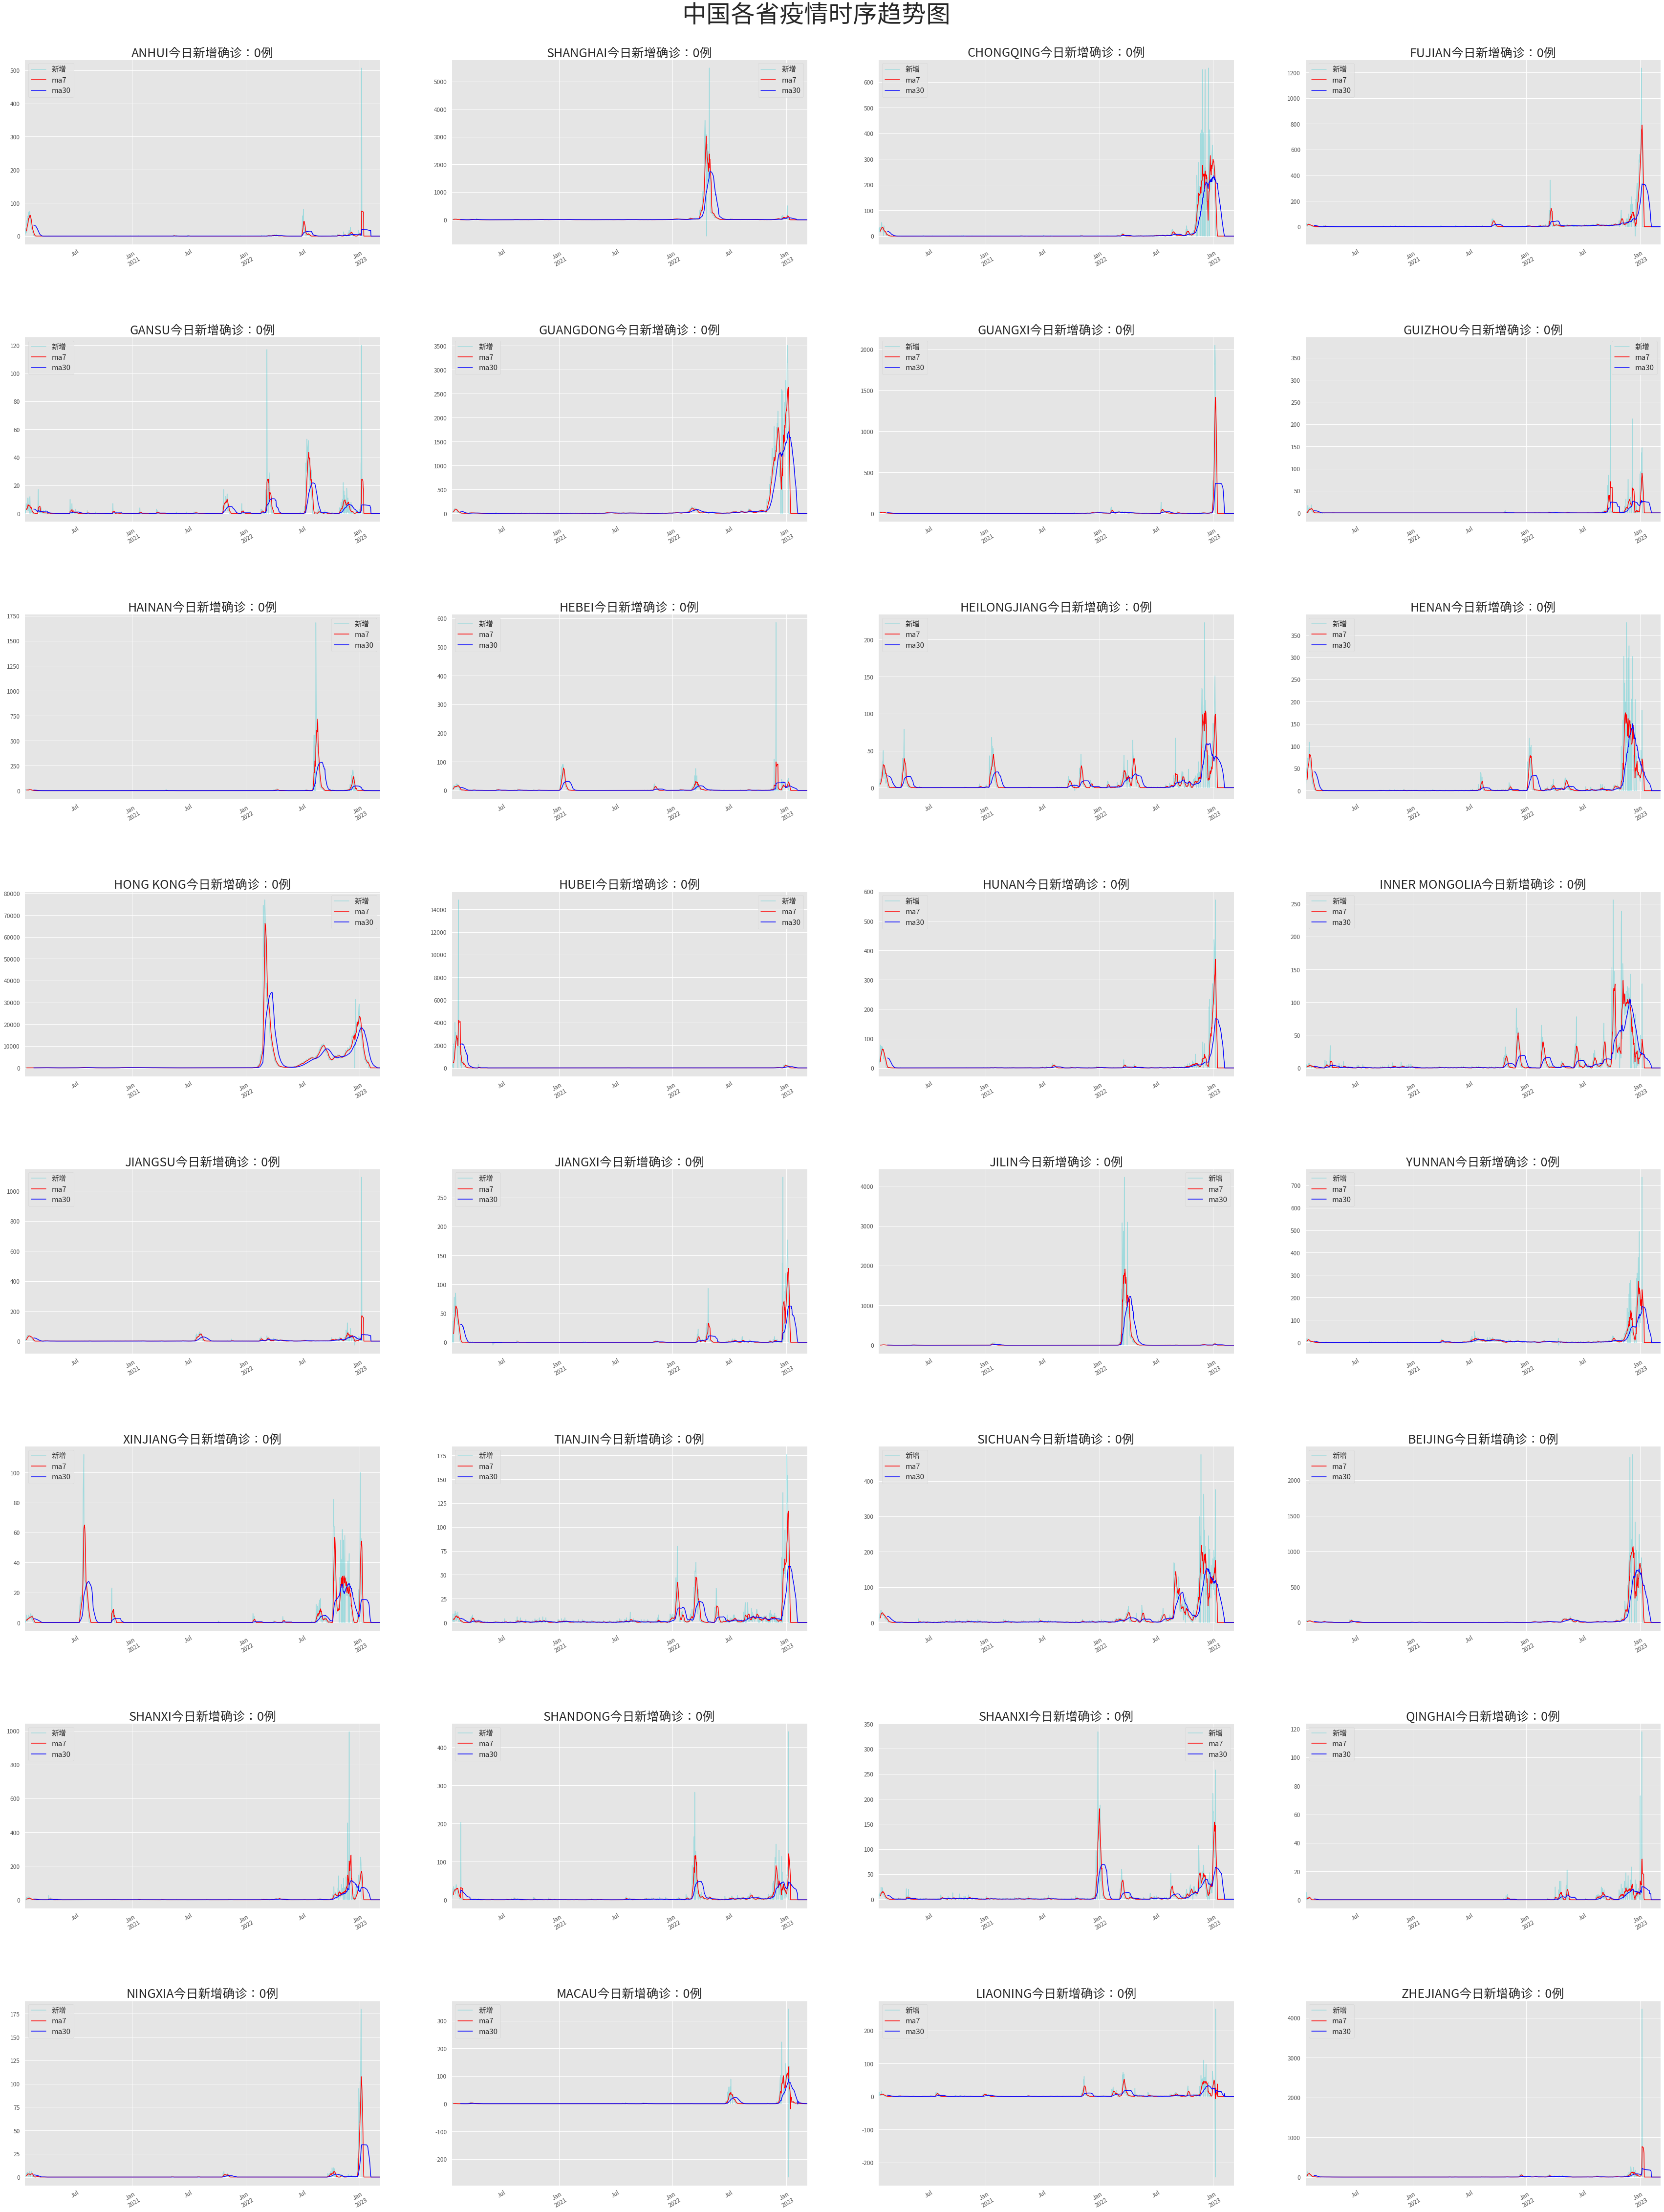

In [ ]:
# Time-series trend chart of the epidemic situation in each province of China

country = '中国'
ma = [7,30]
method = '新增'
kind = '确诊'



data_copy = ts_confirmed_CHINA_incre.copy()
data_copy = data_copy.drop(['Tibet'],axis=1).sort_values(axis=1, by =data_copy.index[-1],ascending=False)
plt.style.use('ggplot')
fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(15*4, 10*8))
plt.subplots_adjust(hspace=0.5)
plt.suptitle(f"{country}各省疫情时序趋势图", fontsize=50, y = 0.9)
for province,ax in zip(data_copy.columns, axs.ravel()):
    data_copy[province].plot(ax=ax,rot = 30, fontsize = 12,alpha = .3, label = method, color = '#06c3cc')
    data_copy[province].rolling(ma[0]).mean().plot(ax=ax,rot = 30, fontsize = 12,label = f'ma{ma[0]}',color = 'red')
    data_copy[province].rolling(ma[1]).mean().plot(ax=ax,rot = 30, fontsize = 12,label = f'ma{ma[1]}',color = 'blue')
    ax.set_title(f"{province.upper()}今日新增{kind}：{int(data_copy[province].tail(1))}例",fontsize = 25)
    ax.legend(fontsize = 15)
    ax.set_xlabel("")
plt.show()

In [ ]:
# Time-series trend chart of the epidemic situation in New York

data_copy1 = ts_confirmed_US_incre

specify = 'New York'
idx = data_copy1.index
ser = data_copy1[specify]
layout_title = specify.upper()
kind = '确诊'
method = '新增'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method}{kind}数',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}天移动平均',
    opacity = .6,
    line=dict(color="#ee5090",width = 1.4),
    marker = dict(color = '#dd001b',size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}天移动平均',
    opacity = .8,
    line=dict(color="#006eff",width = 2.4),
    marker = dict(color = '#412b63',size = 3.2)
)


plotdata = [trace,trace1,trace2]

'''启动绘图'''

x_axis_config = {'title': '日期'}
y_axis_config = {'title': f'{kind}数（{method.upper()}）'}
# 返回指定的图像布局和配置对象
my_layout = Layout(title=f"【{layout_title}】近日【{kind}】数时间序列折线图（{method.upper()}）",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# 生成图表
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')

In [ ]:
# Time-series trend chart of the epidemic situation in Shanghai

data_copy1 = ts_confirmed_CHINA_incre

specify = 'Shanghai'
idx = data_copy1.index
ser = data_copy1[specify]
layout_title = specify.upper()
kind = '确诊'
method = '新增'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method}{kind}数',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}天移动平均',
    opacity = .6,
    line=dict(color="#ee5090",width = 1.4),
    marker = dict(color = '#dd001b',size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}天移动平均',
    opacity = .8,
    line=dict(color="#006eff",width = 2.4),
    marker = dict(color = '#412b63',size = 3.2)
)


plotdata = [trace,trace1,trace2]

'''启动绘图'''

x_axis_config = {'title': '日期'}
y_axis_config = {'title': f'{kind}数（{method.upper()}）'}
# 返回指定的图像布局和配置对象
my_layout = Layout(title=f"【{layout_title}】近日【{kind}】数时间序列折线图（{method.upper()}）",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# 生成图表
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')

In [ ]:
# Since the epidemic, the development trend and important nodes in China

data_copy1 = ts_confirmed_CHINA_incre

specify = '中国'
idx = data_copy1.index
ser = data_copy1.sum(axis=1)
layout_title = specify.upper()
kind = '确诊'
method = '新增'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method}{kind}数',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}天移动平均',
    opacity = .6,
    line=dict(color="#ee5090",width = 1.4),
    marker = dict(color = '#dd001b',size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}天移动平均',
    opacity = .8,
    line=dict(color="#006eff",width = 2.4),
    marker = dict(color = '#412b63',size = 3.2)
)


plotdata = [trace,trace1,trace2]

'''启动绘图'''

x_axis_config = {'title': '日期'}
y_axis_config = {'title': f'{kind}数（{method.upper()}）'}
# 返回指定的图像布局和配置对象
my_layout = Layout(title=f"【{layout_title}】近日【{kind}】数时间序列折线图（{method.upper()}）",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# 生成图表
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')

In [ ]:
# Since the epidemic, the development trend and important nodes in mainland

data_copy1 = ts_confirmed_CHINA_incre

specify = '中国大陆'
idx = data_copy1.index
ser = data_copy1.drop('Hong Kong',axis=1).sum(axis=1)
layout_title = specify.upper()
kind = '确诊'
method = '新增'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method}{kind}数',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}天移动平均',
    opacity = .6,
    line=dict(color="#ee5090",width = 1.4),
    marker = dict(color = '#dd001b',size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}天移动平均',
    opacity = .8,
    line=dict(color="#006eff",width = 2.4),
    marker = dict(color = '#412b63',size = 3.2)
)



plotdata = [trace,trace1,trace2]

'''启动绘图'''

x_axis_config = {'title': '日期'}
y_axis_config = {'title': f'{kind}数（{method.upper()}）'}
# 返回指定的图像布局和配置对象
my_layout = Layout(title=f"【{layout_title}】近日【{kind}】数时间序列折线图（{method.upper()}）",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# 生成图表
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')

In [ ]:
# Since the epidemic, the development trend and important nodes in US

data_copy1 = ts_confirmed_US_incre

specify = '美国'
idx = data_copy1.index
ser = data_copy1.sum(axis=1)
layout_title = specify.upper()
kind = '确诊'
method = '新增'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method}{kind}数',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}天移动平均',
    opacity = .6,
    line=dict(color="#ee5090",width = 1.4),
    marker = dict(color = '#dd001b',size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}天移动平均',
    opacity = .8,
    line=dict(color="#006eff",width = 2.4),
    marker = dict(color = '#412b63',size = 3.2)
)


plotdata = [trace,trace1,trace2]

'''启动绘图'''

x_axis_config = {'title': '日期'}
y_axis_config = {'title': f'{kind}数（{method.upper()}）'}
# 返回指定的图像布局和配置对象
my_layout = Layout(title=f"【{layout_title}】近日【{kind}】数时间序列折线图（{method.upper()}）",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# 生成图表
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')

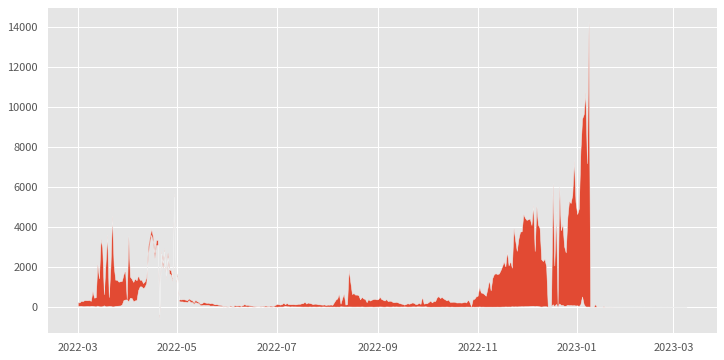

In [ ]:
# Since the epidemic, the development trend in Mainland vs Shanghai

data_copy1 = ts_confirmed_CHINA_incre[ts_confirmed_CHINA_incre.index>='2022-03-01']

specify = '中国大陆 vs. 上海'
idx = data_copy1.index
ser = data_copy1.drop('Hong Kong',axis=1).sum(axis=1)
layout_title = specify.upper()
kind = '确诊'
method = '新增'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method}{kind}数',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}天移动平均',
    opacity = .6,
    line=dict(color="#ee5090",width = 1.4),
    marker = dict(color = '#dd001b',size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}天移动平均',
    opacity = .8,
    line=dict(color="#006eff",width = 2.4),
    marker = dict(color = '#412b63',size = 3.2)
)

trace3 = go.Scatter(
    x = idx,
    y = data_copy1['Shanghai'],
    mode = 'lines+markers',
    name = '上海新增数',
    opacity = .8,
    line=dict(color="#f3832c",width = 1.4),
    marker = dict(color = '#d90013',size = 3.2)
)


plotdata = [trace,trace1,trace2,trace3]

'''启动绘图'''

x_axis_config = {'title': '日期'}
y_axis_config = {'title': f'{kind}数（{method.upper()}）'}
# 返回指定的图像布局和配置对象
my_layout = Layout(title=f"【{layout_title}】近日【{kind}】数时间序列折线图（{method.upper()}）2022年3月至今",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# 生成图表
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')





data_copy1 = ts_confirmed_CHINA_incre[ts_confirmed_CHINA_incre.index>='2022-03-01']
plt.figure(figsize = [12,6])
plt.fill_between(x = idx, 
                 y1 = data_copy1.drop('Hong Kong',axis=1).sum(axis=1),
                 y2 = data_copy1['Shanghai'],animated=True)

### **第四阶段：时间序列建模预测**

In [ ]:
# The trend of new infections by province in China

ts_confirmed_CHINA_incre.head()

Anhui  Shanghai  Liaoning  Macau  Ningxia  Qinghai  Shaanxi  \
2020-01-22      1         9         2      1        1        0        0   
2020-01-23      8         7         1      1        0        0        3   
2020-01-24      6         4         1      0        1        0        2   
2020-01-25     24        13        13      0        1        1       10   
2020-01-26     21         7         4      3        1        0        7   

            Shandong  Shanxi  Beijing  ...  Heilongjiang  Hebei  Hainan  \
2020-01-22         2       1       14  ...             0      1       4   
2020-01-23         4       0        8  ...             2      0       1   
2020-01-24         9       0       14  ...             2      1       3   
2020-01-25        12       5        5  ...             5      6      11   
2020-01-26        19       3       27  ...             6      5       3   

            Guizhou  Guangxi  Guangdong  Gansu  Fujian  Chongqing  Zhejiang  
2020-01-22        1        2         26      0       1          6        10  
2020-01-23        2        3          6      2       4          3        17  
2020-01-24        0       18         21      0       5         18        16  
2020-01-25        1        0         25      2       8         30        19  
2020-01-26        1       13         33      3      17         18        42  

[5 rows x 33 columns]

In [ ]:
ts_confirmed_CHINA_incre.describe().T.sort_values('max',ascending=False)

count         mean          std    min  25%   50%     75%  \
                                                                             
Hong Kong       1143.0  2516.278215  7365.675288  -23.0  3.0  17.0  1235.0   
Hubei           1143.0    63.106737   556.801996   -1.0  0.0   0.0     0.0   
Shanghai        1143.0    58.652668   346.701153 -589.0  2.0   5.0    10.0   
Jilin           1143.0    35.664042   255.161483   -1.0  0.0   0.0     0.0   
Zhejiang        1143.0    10.365704   127.716387    0.0  0.0   0.0     2.0   
Guangdong       1143.0    90.330709   374.922242    0.0  1.0   3.0    13.5   
Beijing         1143.0    35.672791   173.354282   -1.0  0.0   1.0     5.0   
Guangxi         1143.0    11.698163   120.968656    0.0  0.0   0.0     1.0   
Hainan          1143.0     9.171479    73.498599    0.0  0.0   0.0     0.0   
Fujian          1143.0    14.979878    76.695822  -73.0  0.0   1.0     6.0   
Jiangsu         1143.0     4.440070    33.643876  -27.0  0.0   0.0     1.5   
Shanxi          1143.0     6.270341    39.614578    0.0  0.0   0.0     0.0   
Yunnan          1143.0     8.524059    40.228823  -12.0  0.0   1.0     4.0   
Chongqing       1143.0    12.874016    59.917762    0.0  0.0   0.0     0.0   
Hebei           1143.0     2.880140    19.571025   -1.0  0.0   0.0     0.0   
Hunan           1143.0     6.506562    36.985439    0.0  0.0   0.0     1.0   
Anhui           1143.0     1.990376    16.784638    0.0  0.0   0.0     0.0   
Sichuan         1143.0    12.744532    39.628169    0.0  0.0   1.0     5.0   
Shandong        1143.0     5.144357    22.345072    0.0  0.0   0.0     2.0   
Henan           1143.0     8.703412    33.350241    0.0  0.0   0.0     1.0   
Guizhou         1143.0     2.216973    16.170127   -1.0  0.0   0.0     0.0   
Macau           1143.0     3.074366    20.362234 -265.0  0.0   0.0     0.0   
Shaanxi         1143.0     6.409449    23.826988   -1.0  0.0   0.0     2.0   
Jiangxi         1143.0     2.994751    16.670075   -5.0  0.0   0.0     0.0   
Liaoning        1143.0     3.103237    14.492036 -244.0  0.0   0.0     2.0   
Inner Mongolia  1143.0     7.740157    24.400730    0.0  0.0   0.0     2.0   
Heilongjiang    1143.0     5.776903    17.520818   -4.0  0.0   0.0     2.0   
Ningxia         1143.0     1.116360     9.683771    0.0  0.0   0.0     0.0   
Tianjin         1143.0     3.842520    13.572200    0.0  0.0   0.0     2.0   
Tibet           1143.0     1.440945     8.803546   -7.0  0.0   0.0     0.0   
Gansu           1143.0     1.524059     7.104985    0.0  0.0   0.0     0.0   
Qinghai         1143.0     0.684164     4.589925    0.0  0.0   0.0     0.0   
Xinjiang        1143.0     2.702537    10.452748    0.0  0.0   0.0     0.0   

                    max  
                         
Hong Kong       76991.0  
Hubei           14840.0  
Shanghai         5489.0  
Jilin            4222.0  
Zhejiang         4220.0  
Guangdong        3508.0  
Beijing          2360.0  
Guangxi          2046.0  
Hainan           1683.0  
Fujian           1234.0  
Jiangsu          1091.0  
Shanxi            995.0  
Yunnan            736.0  
Chongqing         654.0  
Hebei             585.0  
Hunan             572.0  
Anhui             507.0  
Sichuan           475.0  
Shandong          441.0  
Henan             378.0  
Guizhou           378.0  
Macau             342.0  
Shaanxi           334.0  
Jiangxi           285.0  
Liaoning          265.0  
Inner Mongolia    256.0  
Heilongjiang      223.0  
Ningxia           180.0  
Tianjin           176.0  
Tibet             139.0  
Gansu             120.0  
Qinghai           118.0  
Xinjiang          112.0

In [ ]:
# data processing
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import re

# data visualization
import plotly.graph_objs as go
from plotly.graph_objs import Bar, Layout
from plotly import offline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

# change text color
import colorama
from colorama import Fore, Style


def Decompose_CHINA(ts_data_processed,
                    latest_data_processed,
                    prev_data_processed,
                    start=None,
                    end=None,
                    ma = None,
                    method = '新增',
                    specify = None,
                    verbose = 1,
                    kind = '确诊'):

    ts_copy = ts_data_processed.copy()

    district = latest_data_processed.index.to_list()
    # cases
    cum_cases_total = ts_data_processed.sum(axis=1).sum()
    incre_cases_total = ts_data_processed.sum(axis=1)[-1]

    # deaths
    cum_deaths_total = latest_data_processed['Deaths'].sum()
    incre_deaths_total = (latest_data_processed['Deaths']- prev_data_processed['Deaths']).sum()

    if specify is not None and specify != 'All':
        cum_cases_district_total =ts_data_processed[specify].sum().astype('int32')
        incre_cases_district_total = ts_data_processed[specify][-1].astype('int32')

        cum_deaths_district_total = latest_data_processed.loc[specify,'Deaths']
        incre_deaths_district_total = latest_data_processed.loc[specify,'Deaths'] - prev_data_processed.loc[specify,'Deaths']

    # last_update date
    last_update = latest_data_processed['Last_Update'].unique()[0]

    cum_deaths_total = latest_data_processed['Deaths'].sum()
    incre_deaths_total = (latest_data_processed['Deaths']- prev_data_processed['Deaths']).sum()

    print("国家：中国")
    print(f"最新更新时间：{last_update}")
    print('-'*40 + 'TOTAL' + '-'*41)
    print(f"截至目前【中国】累计确诊：{Fore.BLUE}{int(cum_cases_total)}{Style.RESET_ALL} | 新增确诊：{Fore.BLUE}{int(incre_cases_total)}{Style.RESET_ALL}\n"
          f"截至目前【中国】累计死亡：{Fore.RED}{cum_deaths_total}{Style.RESET_ALL} | 新增死亡：{Fore.RED}{incre_deaths_total}{Style.RESET_ALL}")
    if specify is not None and specify != 'All':
        print(f"截至目前【{specify}】累计确诊：{Fore.BLUE}{cum_cases_district_total}{Style.RESET_ALL} | 新增确诊：{Fore.BLUE}{incre_cases_district_total}{Style.RESET_ALL}\n"
              f"截至目前【{specify}】累计死亡：{Fore.RED}{cum_deaths_district_total}{Style.RESET_ALL} | 新增死亡：{Fore.RED}{incre_deaths_district_total}{Style.RESET_ALL}")
    print('-'*40 + 'DETAIL' + '-'*40)
    print(f"{Fore.BLUE}蓝色{Style.RESET_ALL}为确诊数\n{Fore.RED}红色{Style.RESET_ALL}为死亡数")
    print('-'*86)
    if verbose == 0:
        from tabulate import tabulate
        if method == '新增':
            print(tabulate(sorted(zip(district,
                                      ts_data_processed.tail(1).T.reindex(latest_data_processed.index).values,
                                      latest_data_processed['Deaths']- prev_data_processed['Deaths'],
                                      latest_data_processed['Incident_Rate'],
                                      latest_data_processed['Case_Fatality_Ratio']),
                                  key = lambda x: x[1],reverse=True),
                           headers=["省级行政区", "新增确诊数↓", "新增死亡数", "每10万人确诊人数","累计致死率（%）"],
                           tablefmt="psql"))
        elif method == '累计':
            print(tabulate(sorted(zip(district,
                                      ts_data_processed.sum(),
                                      latest_data_processed['Deaths'],
                                      latest_data_processed['Incident_Rate'],
                                      latest_data_processed['Case_Fatality_Ratio']),
                                  key = lambda x: x[4],reverse=True),
                           headers=["省级行政区", f"{method}确诊数", f"{method}死亡数", "每10万人确诊人数","累计致死率（%）↓"],
                           tablefmt="psql"))
    if verbose == 1:
        if method == '新增':
            print("{:<25} {:<10} {:<10} {:<10} {:<10}".format('省级行政区',
                                                              f'{method}确诊数↓',
                                                              f'{method}死亡数',
                                                              '每10万人确诊人数',
                                                              '累计致死率'))
            for province, case, death, incident_rate, case_fatality_ratio in sorted(zip(district,
                                                                                        ts_data_processed.tail(1).T.reindex(latest_data_processed.index).values,
                                                                                        latest_data_processed['Deaths']- prev_data_processed['Deaths'],
                                                                                        latest_data_processed['Incident_Rate'],
                                                                                        latest_data_processed['Case_Fatality_Ratio']),
                                                                                    key = lambda x: x[1],reverse=True):
                print("{:<30} {:<25} {:<23} {:<26} {:<23}".format(province,
                                                                  f"{Fore.BLUE}{int(case[0])}{Style.RESET_ALL}",
                                                                  f"{Fore.RED}{death}{Style.RESET_ALL}",
                                                                  f"{Fore.GREEN}{round(incident_rate,3)}{Style.RESET_ALL}",
                                                                  f"{Fore.LIGHTYELLOW_EX}{round(case_fatality_ratio,3)}%{Style.RESET_ALL}"
                                                                  ))
        elif method == '累计':
            print("{:<25} {:<10} {:<10} {:<10} {:<10}".format('省级行政区',
                                                              f'{method}确诊数',
                                                              f'{method}死亡数',
                                                              '每10万人确诊人数',
                                                              '累计致死率↓'))
            for province, case, death, incident_rate, case_fatality_ratio in sorted(zip(district,
                                                                                        #latest_data_processed['Confirmed'],
                                                                                        ts_data_processed.sum().reindex(latest_data_processed.index),
                                                                                        latest_data_processed['Deaths'],
                                                                                        latest_data_processed['Incident_Rate'],
                                                                                        latest_data_processed['Case_Fatality_Ratio']),
                                                                                    key = lambda x: x[4],reverse=True):
                #print(province, f"{Fore.BLUE}{case}{Style.RESET_ALL}",f"{Fore.RED}{death}{Style.RESET_ALL}")
                print("{:<30} {:<25} {:<23} {:<26} {:<23}".format(province,
                                                                  f"{Fore.BLUE}{int(case)}{Style.RESET_ALL}",
                                                                  f"{Fore.RED}{death}{Style.RESET_ALL}",
                                                                  f"{Fore.GREEN}{round(incident_rate,3)}{Style.RESET_ALL}",
                                                                  f"{Fore.LIGHTYELLOW_EX}{round(case_fatality_ratio,3)}%{Style.RESET_ALL}"
                                                                  ))
    ###############################################################################################################################
    if method == '新增':
        data = ts_data_processed
    elif method == '累计':
        data = ts_data_processed.cumsum()
    if start is not None:
        data = data[data.index>=start]
    if end is not None:
        data = data[data.index<=end]
    if (start is not None) and (end is not None):
        data = data[(data.index>=start) & (data.index<=end)]
    if end is not None:
        data = data[data.index<=end]
        # print(data)
    # loop through tickers and axes
    # filter df for ticker and plot on specified axes
    if specify is not None:
        idx = data.index
        if specify != 'All':
            ser = data[specify]
            layout_title = specify.upper()
        else:
            ser = data.drop(['Tibet','Hong Kong'],axis=1).sum(axis=1)
            layout_title = '中国大陆'
        trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method}{kind}数',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
        trace1 = go.Scatter(
            x = idx,
            y = ser.rolling(ma[0]).mean(),
            mode = 'lines+markers',
            name = f'{ma[0]}天移动平均',
            opacity = .6,
            line=dict(color="#ee5090",width = 1.4),
            marker = dict(color = '#dd001b',size = 2.2)
        )
        trace2 = go.Scatter(
            x = idx,
            y = ser.rolling(ma[1]).mean(),
            mode = 'lines+markers',
            name = f'{ma[1]}天移动平均',
            opacity = .8,
            line=dict(color="#006eff",width = 2.4),
            marker = dict(color = '#412b63',size = 3.2)
        )


        plotdata = [trace,trace1,trace2]

        '''启动绘图'''

        x_axis_config = {'title': '日期'}
        y_axis_config = {'title': f'{kind}数（{method.upper()}）'}
        # 返回指定的图像布局和配置对象
        my_layout = Layout(title=f"【{layout_title}】近日【{kind}】数时间序列折线图（{method.upper()}）",
                           xaxis=x_axis_config, yaxis=y_axis_config)
        # 生成图表
        offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')

    else:

        data_copy = data.copy()
        data = data.drop(['Tibet'],axis=1).sort_values(axis=1, by =data.index[-1],ascending=False)
        plt.style.use('ggplot')
        fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(15*4, 10*8))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle("中国各省疫情趋势图", fontsize=50, y = 0.9)
        for province,ax in zip(data.columns, axs.ravel()):
            #ax.set_ylim([0, 500])
            data[province].plot(ax=ax,rot = 30, fontsize = 12,alpha = .3, label = method, color = '#06c3cc')
            if ma is not None:
                data[province].rolling(ma[0]).mean().plot(ax=ax,rot = 30, fontsize = 12,label = f'ma{ma[0]}',color = 'red')
                data[province].rolling(ma[1]).mean().plot(ax=ax,rot = 30, fontsize = 12,label = f'ma{ma[1]}',color = 'blue')
            ax.set_title(f"{province.upper()}今日新增{kind}：{int(ts_copy[province].tail(1))}例",fontsize = 25)
            ax.legend(fontsize = 15)
            ax.set_xlabel("")
        plt.show()



def Decompose_US(ts_data_processed,
                 latest_data_processed,
                 prev_data_processed,
                 start=None,
                 end=None,
                 ma = None,
                 method = '新增',
                 specify = None,
                 verbose = 1,
                 kind = '确诊'):

    ts_copy = ts_data_processed.copy()

    district = latest_data_processed.index.to_list()
    # cases

    cum_cases_total = latest_data_processed['Confirmed'].sum()
    incre_cases_total = latest_data_processed['Confirmed'].sum()-prev_data_processed['Confirmed'].sum()


    # deaths
    cum_deaths_total = latest_data_processed['Deaths'].sum()
    incre_deaths_total = (latest_data_processed['Deaths']- prev_data_processed['Deaths']).sum()

    if specify is not None and specify != 'All':
        cum_cases_district_total = latest_data_processed.loc[specify,'Confirmed']
        incre_cases_district_total = latest_data_processed.loc[specify,'Confirmed'] - prev_data_processed.loc[specify,'Confirmed']

        cum_deaths_district_total = latest_data_processed.loc[specify,'Deaths']
        incre_deaths_district_total = latest_data_processed.loc[specify,'Deaths'] - prev_data_processed.loc[specify,'Deaths']

    # last_update date
    last_update = latest_data_processed['Last_Update'].unique()[0]

    cum_deaths_total = latest_data_processed['Deaths'].sum()
    incre_deaths_total = (latest_data_processed['Deaths']- prev_data_processed['Deaths']).sum()

    print("国家：美国")
    print(f"最新更新时间：{last_update}")
    print('-'*40 + 'TOTAL' + '-'*41)
    print(f"截至目前【美国】累计确诊：{Fore.BLUE}{cum_cases_total}{Style.RESET_ALL} | 新增确诊：{Fore.BLUE}{incre_cases_total}{Style.RESET_ALL}\n"
          f"截至目前【美国】累计死亡：{Fore.RED}{cum_deaths_total}{Style.RESET_ALL} | 新增死亡：{Fore.RED}{incre_deaths_total}{Style.RESET_ALL}")
    if specify is not None and specify != 'All':
        print(f"截至目前【{specify}】累计确诊：{Fore.BLUE}{cum_cases_district_total}{Style.RESET_ALL} | 新增确诊：{Fore.BLUE}{incre_cases_district_total}{Style.RESET_ALL}\n"
              f"截至目前【{specify}】累计死亡：{Fore.RED}{cum_deaths_district_total}{Style.RESET_ALL} | 新增死亡：{Fore.RED}{incre_deaths_district_total}{Style.RESET_ALL}")
    print('-'*40 + 'DETAIL' + '-'*40)
    print(f"{Fore.BLUE}蓝色{Style.RESET_ALL}为确诊数\n{Fore.RED}红色{Style.RESET_ALL}为死亡数")
    print('-'*86)
    if verbose == 0:
        from tabulate import tabulate
        if method == '新增':
            print(tabulate(sorted(zip(district,
                                      latest_data_processed['Confirmed']- prev_data_processed['Confirmed'],
                                      latest_data_processed['Deaths']- prev_data_processed['Deaths'],
                                      latest_data_processed['Incident_Rate'],
                                      latest_data_processed['Case_Fatality_Ratio']),
                                  key = lambda x: x[1],reverse=True),
                           headers=["省级行政区", "新增确诊数↓", "新增死亡数", "每10万人确诊人数","累计致死率（%）"],
                           tablefmt="psql"))
        elif method == '累计':
            print(tabulate(sorted(zip(district,
                                      latest_data_processed['Confirmed'],
                                      latest_data_processed['Deaths'],
                                      latest_data_processed['Incident_Rate'],
                                      latest_data_processed['Case_Fatality_Ratio']),
                                  key = lambda x: x[4],reverse=True),
                           headers=["省级行政区", f"{method}确诊数", f"{method}死亡数", "每10万人确诊人数","累计致死率（%）↓"],
                           tablefmt="psql"))
    if verbose == 1:
        if method == '新增':
            print("{:<25} {:<10} {:<10} {:<10} {:<10}".format('省级行政区',
                                                              f'{method}确诊数↓',
                                                              f'{method}死亡数',
                                                              '每10万人确诊人数',
                                                              '累计致死率'))
            for province, case, death, incident_rate, case_fatality_ratio in sorted(zip(district,
                                                                                        #  (latest_data_processed['Confirmed']- prev_data_processed['Confirmed']).clip(lower=0),
                                                                                        #  (latest_data_processed['Deaths']- prev_data_processed['Deaths']).clip(lower=0),
                                                                                        #latest_data_processed['Confirmed']- prev_data_processed['Confirmed'],
                                                                                        latest_data_processed['Confirmed']- prev_data_processed['Confirmed'],
                                                                                        latest_data_processed['Deaths']- prev_data_processed['Deaths'],
                                                                                        latest_data_processed['Incident_Rate'],
                                                                                        latest_data_processed['Case_Fatality_Ratio']),
                                                                                    key = lambda x: x[1],reverse=True):
                #print(province, f"{Fore.BLUE}{case}{Style.RESET_ALL}",f"{Fore.RED}{death}{Style.RESET_ALL}")
                print("{:<30} {:<25} {:<23} {:<26} {:<23}".format(province,
                                                                  f"{Fore.BLUE}{case}{Style.RESET_ALL}",
                                                                  f"{Fore.RED}{death}{Style.RESET_ALL}",
                                                                  f"{Fore.GREEN}{round(incident_rate,3)}{Style.RESET_ALL}",
                                                                  f"{Fore.LIGHTYELLOW_EX}{round(case_fatality_ratio,3)}%{Style.RESET_ALL}"
                                                                  ))
        elif method == '累计':
            print("{:<25} {:<10} {:<10} {:<10} {:<10}".format('省级行政区',
                                                              f'{method}确诊数',
                                                              f'{method}死亡数',
                                                              '每10万人确诊人数',
                                                              '累计致死率↓'))
            for province, case, death, incident_rate, case_fatality_ratio in sorted(zip(district,
                                                                                        #latest_data_processed['Confirmed'],
                                                                                        latest_data_processed['Confirmed'],
                                                                                        latest_data_processed['Deaths'],
                                                                                        latest_data_processed['Incident_Rate'],
                                                                                        latest_data_processed['Case_Fatality_Ratio']),
                                                                                    key = lambda x: x[4],reverse=True):
                #print(province, f"{Fore.BLUE}{case}{Style.RESET_ALL}",f"{Fore.RED}{death}{Style.RESET_ALL}")
                print("{:<30} {:<25} {:<23} {:<26} {:<23}".format(province,
                                                                  f"{Fore.BLUE}{int(case)}{Style.RESET_ALL}",
                                                                  f"{Fore.RED}{death}{Style.RESET_ALL}",
                                                                  f"{Fore.GREEN}{round(incident_rate,3)}{Style.RESET_ALL}",
                                                                  f"{Fore.LIGHTYELLOW_EX}{round(case_fatality_ratio,3)}%{Style.RESET_ALL}"
                                                                  ))
    ###############################################################################################################################
    if method == '新增':
        data = ts_data_processed
    elif method == '累计':
        data = ts_data_processed.cumsum()
    if start is not None:
        data = data[data.index>=start]
    if end is not None:
        data = data[data.index<=end]
    if (start is not None) and (end is not None):
        data = data[(data.index>=start) & (data.index<=end)]
    if end is not None:
        data = data[data.index<=end]
        # print(data)
    # loop through tickers and axes
    # filter df for ticker and plot on specified axes
    if specify is not None:
        idx = data.index
        if specify != 'All':
            ser = data[specify]
            layout_title = specify.upper()
        else:
            ser = data.sum(axis=1)
            layout_title = '美国'
        trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method}{kind}数',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
        trace1 = go.Scatter(
            x = idx,
            y = ser.rolling(ma[0]).mean(),
            mode = 'lines+markers',
            name = f'{ma[0]}天移动平均',
            opacity = .6,
            line=dict(color="#ee5090",width = 1.4),
            marker = dict(color = '#dd001b',size = 2.2)
        )
        trace2 = go.Scatter(
            x = idx,
            y = ser.rolling(ma[1]).mean(),
            mode = 'lines+markers',
            name = f'{ma[1]}天移动平均',
            opacity = .8,
            line=dict(color="#006eff",width = 2.4),
            marker = dict(color = '#412b63',size = 3.2)
        )


        plotdata = [trace,trace1,trace2]

        '''启动绘图'''

        x_axis_config = {'title': '日期'}
        y_axis_config = {'title': f'{kind}数（{method.upper()}）'}
        # 返回指定的图像布局和配置对象
        my_layout = Layout(title=f"【{layout_title}】近日【{kind}】数时间序列折线图（{method.upper()}）",
                           xaxis=x_axis_config, yaxis=y_axis_config)
        # 生成图表
        offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')

    else:

        data_copy = data.copy()
        plt.style.use('ggplot')
        fig, axs = plt.subplots(nrows=13, ncols=4, figsize=(15*4, 10*13))
        plt.subplots_adjust(hspace=0.5)
        plt.suptitle(f"美国各州疫情趋势图", fontsize=50, y = 0.9)
        for province,ax in zip(data.columns, axs.ravel()):
            #ax.set_ylim([0, 500])
            data[province].plot(ax=ax,rot = 30, fontsize = 12,alpha = .3, label = method, color = '#06c3cc')
            if ma is not None:
                data[province].rolling(ma[0]).mean().plot(ax=ax,rot = 30, fontsize = 12,label = f'ma{ma[0]}',color = 'red')
                data[province].rolling(ma[1]).mean().plot(ax=ax,rot = 30, fontsize = 12,label = f'ma{ma[1]}',color = 'blue')
            ax.set_title(f"{province.upper()}今日新增{kind}：{int(ts_copy[province].tail(1))}例",fontsize = 25)
            ax.legend(fontsize = 15)
            ax.set_xlabel("")
        plt.show()

In [ ]:
Decompose_CHINA(
    ts_confirmed_CHINA_incre,
    latest_data_CHINA,
    prev_data_CHINA,
    start='2022-03-15',
    ma = [3,7],
    method = '新增',              # method = '累计'
    specify = 'Shanghai',         # specify = 'Shanghai' specify = 'All' specify = None
    verbose = 1,
    kind = '确诊'
)

国家：中国
最新更新时间：2023-03-10 04:21:03
----------------------------------------TOTAL-----------------------------------------
截至目前【中国】累计确诊：3381708 | 新增确诊：0
截至目前【中国】累计死亡：18861 | 新增死亡：1
截至目前【Shanghai】累计确诊：67040 | 新增确诊：0
截至目前【Shanghai】累计死亡：595 | 新增死亡：0
----------------------------------------DETAIL----------------------------------------
蓝色为确诊数
红色为死亡数
--------------------------------------------------------------------------------------
省级行政区                     新增确诊数↓     新增死亡数      每10万人确诊人数  累计致死率     
Anhui                          0                0              3.597             0.308%        
Beijing                        0                0              189.294           0.049%        
Chongqing                      0                0              47.437            0.075%        
Fujian                         0                0              43.446            0.012%        
Gansu                          0                0              6.606             0.115%        
Guangdong         

#### Decomposition

Decomposition 拆解成多个部分，可以分解成这四个分解属性：

- level
- trend
- seasonality
- noise

```diff
- 所有的时序数据都有level和noise，但是trend和seasonality不一定
```

这4部分组合起来就形成了我们所说的时间序列


- Additive

```
y(t) = level + trend + seasonality + noise

```


Additive模型是线性的。趋势是线性的，季节性具有恒定的频率和幅度。随着时间的推移，变化是恒定的

- Multiplicative 


```
y(t) = level * trend * seasonality * noise

```
Multiplicative模型是非线性的。趋势是非线性的，季节性不恒定。随着时间的推移，变化是不恒定的。

大多数时间序列是加法模型和乘法模型的组合，很难将现实世界的时间序列识别为一个单一的模型。

In [ ]:
ts_shanghai_confirmed = ts_shanghai_covid['新增本土确诊']
ts_shanghai_asymptomatic = ts_shanghai_covid['新增本土无症状']

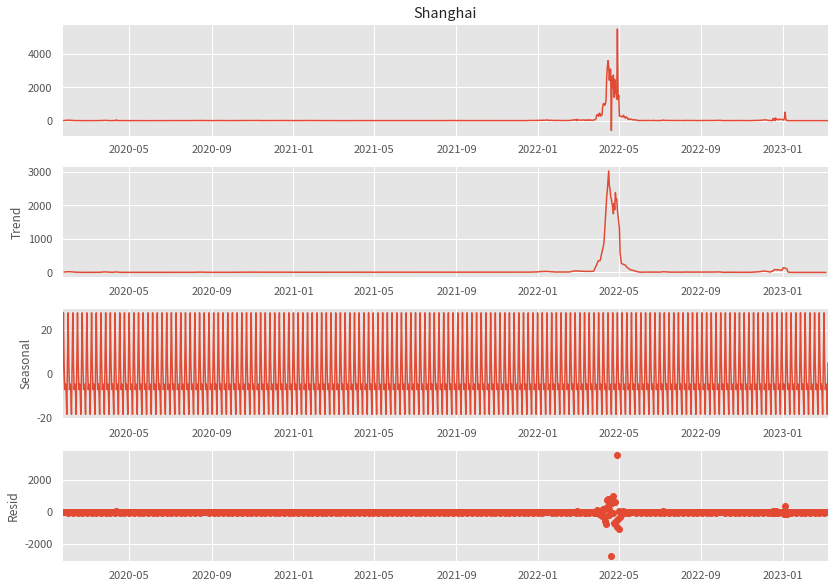

In [ ]:
# Shanghai

from statsmodels.tsa.seasonal import seasonal_decompose

series_2020 = ts_confirmed_CHINA_incre['Shanghai']
result = seasonal_decompose(series_2020, model='additive')
result.plot()
plt.show()

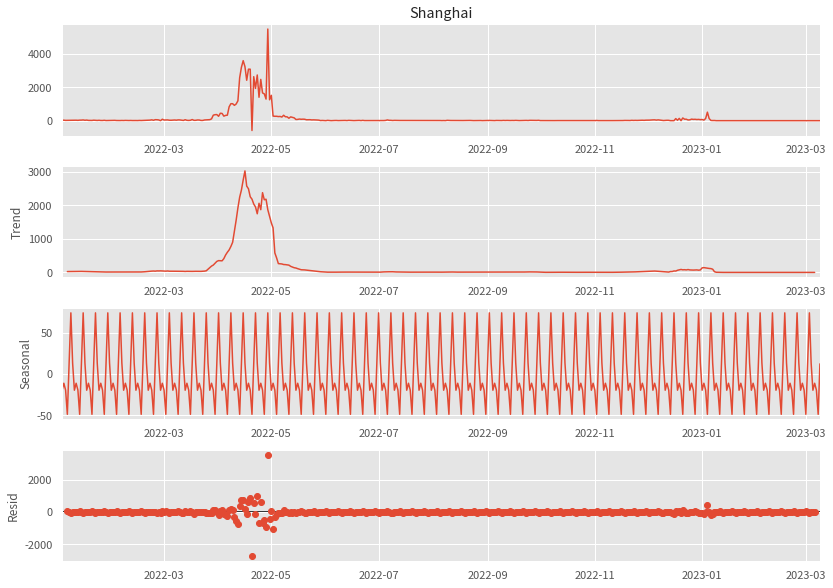

In [ ]:
series_2022 = ts_confirmed_CHINA_incre['Shanghai'][ts_confirmed_CHINA_incre['Shanghai'].index>'2022-01-01']
result = seasonal_decompose(series_2022, model='additive')
result.plot()
plt.show() 

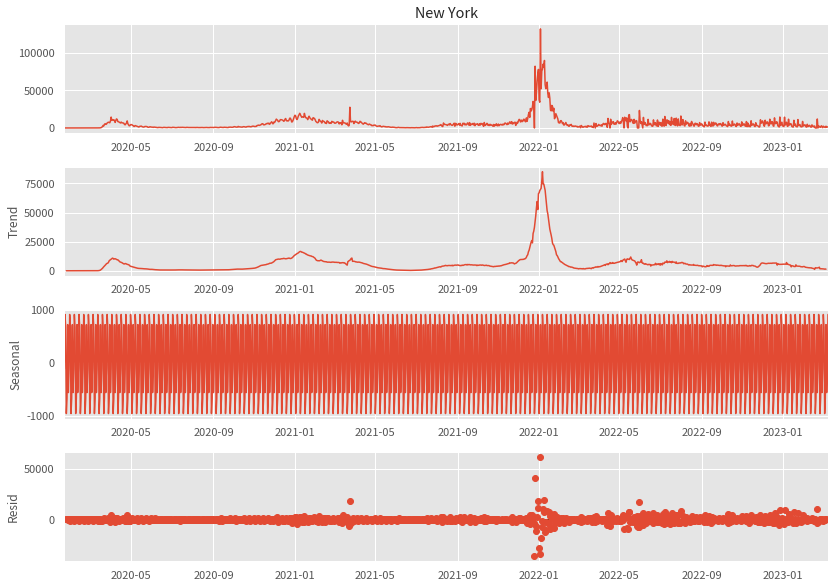

In [ ]:
# New York
nyc_series = ts_confirmed_US_incre['New York']
nyc_result = seasonal_decompose(nyc_series, model='additive')
nyc_result.plot()
plt.show() 

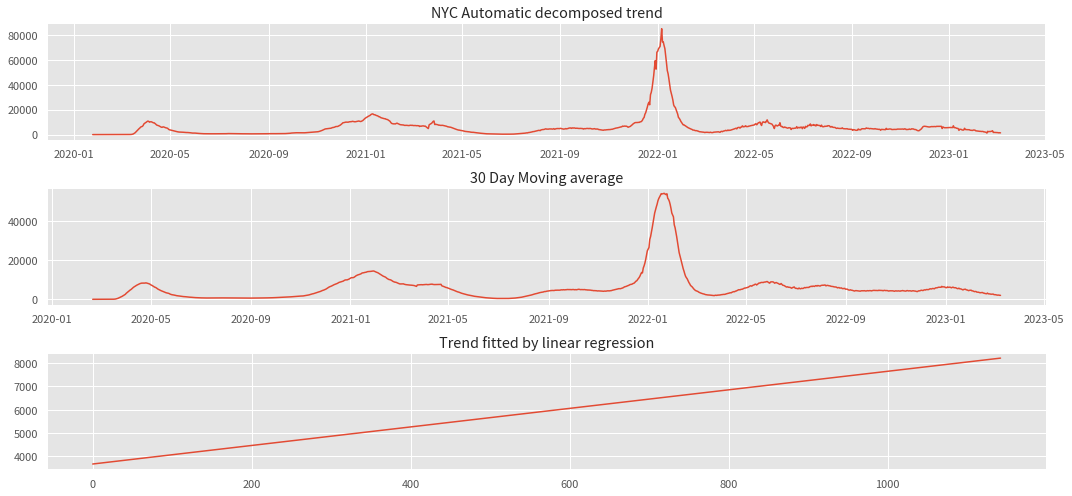

In [ ]:
# The trend of newly diagnosed cases in New York is not clear
# There is no clear linear relationship, because it contains a lot of seasonality and noise

fig = plt.figure(figsize=(15, 7))
layout = (3, 2)
pm_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
mv_ax = plt.subplot2grid(layout, (1, 0), colspan=2)
fit_ax = plt.subplot2grid(layout, (2, 0), colspan=2)

pm_ax.plot(nyc_result.trend)
pm_ax.set_title("NYC Automatic decomposed trend")
 
mm = nyc_series.rolling(30).mean()
mv_ax.plot(mm)
mv_ax.set_title("30 Day Moving average")

from sklearn.linear_model import LinearRegression

X = [i for i in range(0, len(nyc_series))]
X = np.reshape(X, (len(X), 1))
y = nyc_series
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
fit_ax.plot(trend)
fit_ax.set_title("Trend fitted by linear regression")

plt.tight_layout()

Text(0, 0.5, '2022')

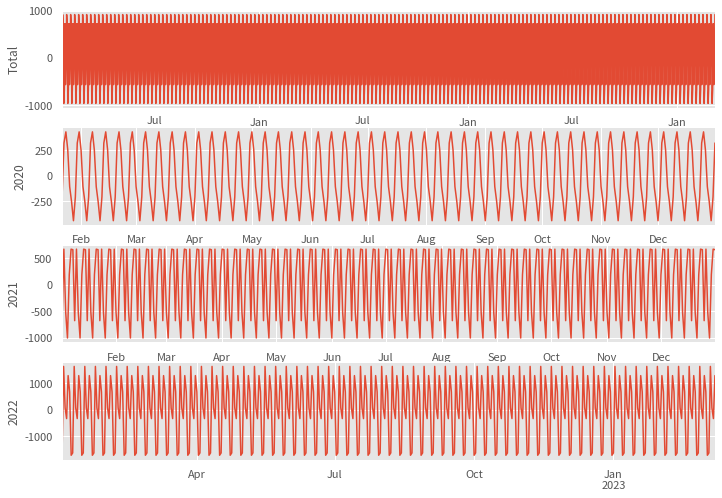

In [ ]:
# There are 4 spikes every month
# However, it seems to be more frequent in 2021 and 2022, with 8 spikes a month

plt.subplot(411)
nyc_series = ts_confirmed_US_incre['New York']
nyc_result = seasonal_decompose(nyc_series, model='additive')
nyc_result.seasonal.plot()
plt.ylabel('Total')
plt.subplot(412)
nyc_series_2020 = ts_confirmed_US_incre['New York'][ts_confirmed_US_incre.index<'2021']
nyc_result_2020 = seasonal_decompose(nyc_series_2020, model='additive')
nyc_result_2020.seasonal.plot()
plt.ylabel('2020')
plt.subplot(413)
nyc_series_2021 = ts_confirmed_US_incre['New York'][(ts_confirmed_US_incre.index>'2021') &(ts_confirmed_US_incre.index<'2022')]
nyc_result_2021 = seasonal_decompose(nyc_series_2021, model='additive')
nyc_result_2021.seasonal.plot()
plt.ylabel('2021')
plt.subplot(414)
nyc_series_2022 = ts_confirmed_US_incre['New York'][ts_confirmed_US_incre.index>'2022']
nyc_result_2022 = seasonal_decompose(nyc_series_2022, model='additive')
nyc_result_2022.seasonal.plot()
plt.ylabel('2022')

Text(0.5, 1.0, 'Mean over time')

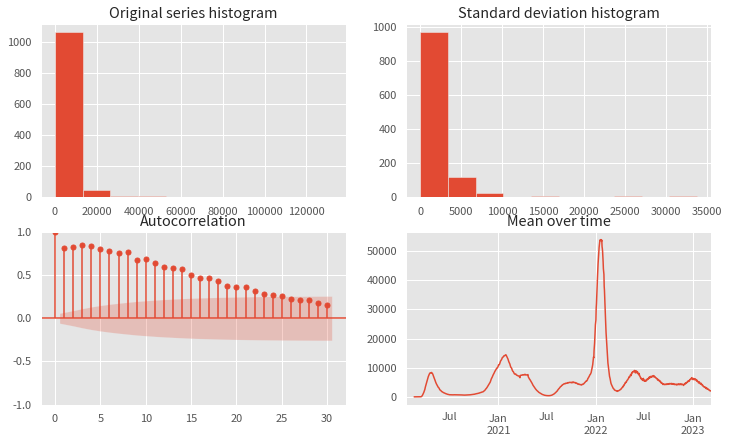

In [ ]:
# Our time series data does not obey the Gaussian distribution
# The autocorrelation coefficient is not in the blue shaded interval
# So, there is no white noise

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(12, 7))
layout = (2, 2)
hist_ax = plt.subplot2grid(layout, (0, 0))
ac_ax = plt.subplot2grid(layout, (1, 0))
hist_std_ax = plt.subplot2grid(layout, (0, 1))
mean_ax = plt.subplot2grid(layout, (1, 1))

nyc_series.hist(ax=hist_ax)
hist_ax.set_title("Original series histogram")

plot_acf(nyc_series, lags=30, ax=ac_ax)
ac_ax.set_title("Autocorrelation")

mm = nyc_series.rolling(7).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard deviation histogram")

mm = nyc_series.rolling(30).mean()
mm.plot(ax=mean_ax)
mean_ax.set_title("Mean over time")

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



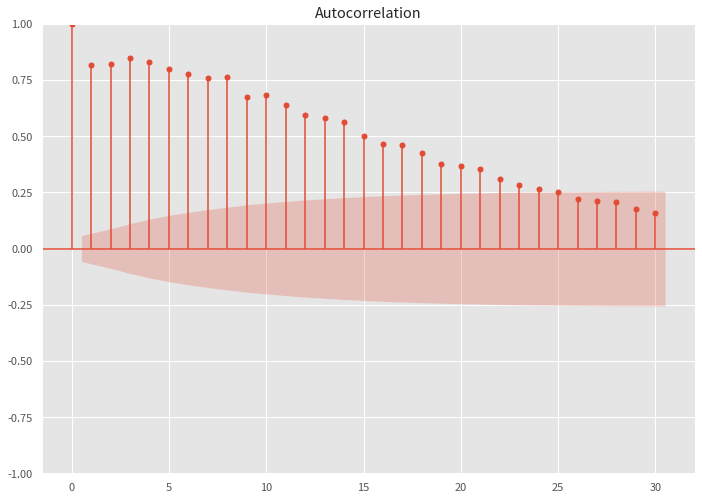

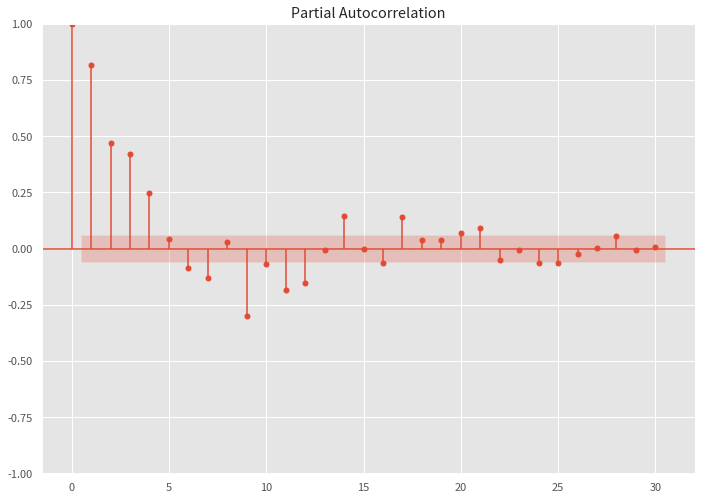

In [ ]:
# ACF doesn't drop to 0 very quickly, so there is no stationary

plot_acf(nyc_series, lags=30)
plot_pacf(nyc_series, lags=30)
plt.show()

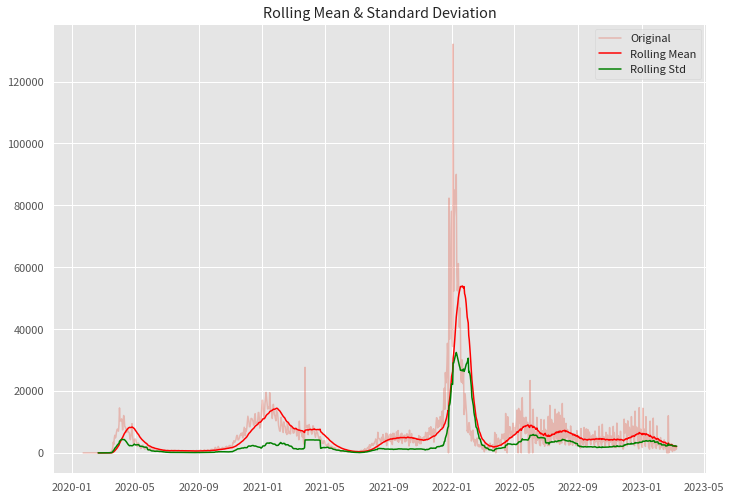

In [ ]:
# Obviously, the mean and standard deviation are not constant over time, so, this is not stationary

rolmean = nyc_series.rolling(window=30).mean()
rolstd = nyc_series.rolling(window=30).std()

# Plot rolling statistics:
orig = plt.plot(nyc_series, label='Original',alpha = .3)
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='green', label='Rolling Std')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
# p-value: 0.007040 is less than 0.05, so rejecting the null hypothesis H0, which means that the sequence is stable

from statsmodels.tsa.stattools import adfuller

X = nyc_series
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.977112
p-value: 0.001535
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



ADF检验结果：We reject H0 and the series is stationary
ADF检验所得P值：0.001535


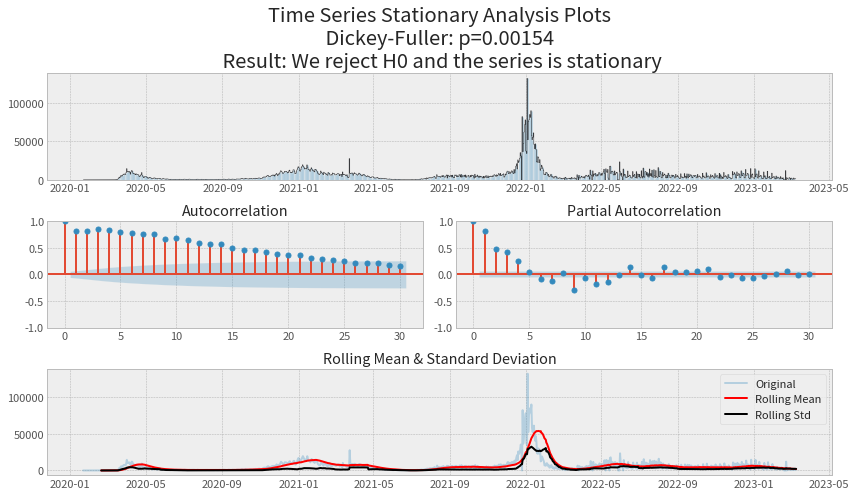

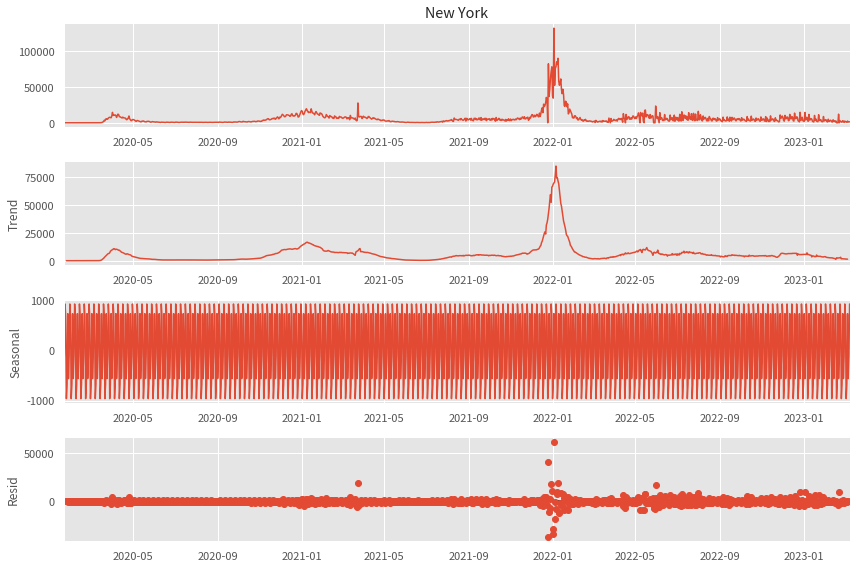

In [ ]:
# ADF test results：We reject H0 and the series is stationary
# ADF test p-value：0.001535

import statsmodels as sm
from statsmodels.tsa import api as smt

def tsplot(y, lags=None, figsize=(12, 7), ma = 30, decompose = True):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=(12, 7))
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        mean_std_ax = plt.subplot2grid(layout, (2, 0), colspan=2)
        #y.plot.area(ax=ts_ax)
        ts_ax.step(y.index,y,color = '#202124',linewidth = .5)
        ts_ax.bar(y.index,y,alpha = .8)
        
        p_value = sm.tsa.stattools.adfuller(y)[1]
        hypothesis_result = "We reject H0 and the series is stationary" if p_value <= 0.05 else "We can not reject H0 and the series is NOT stationary"
        ts_ax.set_title(
            'Time Series Stationary Analysis Plots\n Dickey-Fuller: p={0:.5f} \n Result: {1}'.format(p_value, hypothesis_result),
        fontsize = 20)
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

        rolmean = y.rolling(window=ma).mean()
        rolstd = y.rolling(window=ma).std()

        # Plot rolling statistics:
        orig = plt.plot(y, label='Original',alpha = .3)
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label='Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        print(f"ADF检验结果：{Fore.RED}{hypothesis_result}{Style.RESET_ALL}")
        print(f"ADF检验所得P值：{Fore.BLUE}{round(p_value,6)}{Style.RESET_ALL}")
    if decompose:
        plt.rcParams["figure.figsize"] = (12,8)
        result = seasonal_decompose(y, model='additive')
        result.plot()
        plt.show() 

tsplot(nyc_series, lags=30)

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



ADF检验结果：We can not reject H0 and the series is NOT stationary
ADF检验所得P值：0.99188


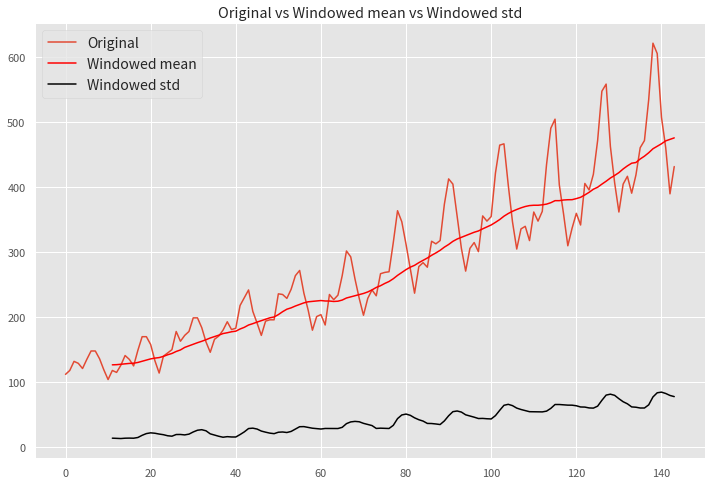

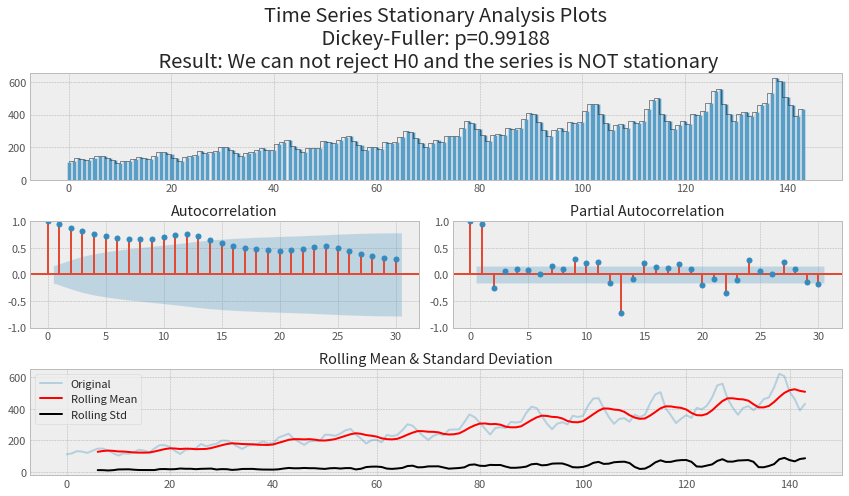

In [ ]:
# P-value is much greater than 0.05, which is not stationary

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
passengers = pd.read_csv(url)

passengers.Passengers.plot(label='Original')
passengers.Passengers.rolling(window=12).mean().plot(
    color='red', label='Windowed mean')
passengers.Passengers.rolling(window=12).std().plot(
    color='black', label='Windowed std')
plt.legend(fontsize = 14)
plt.title('Original vs Windowed mean vs Windowed std')

tsplot(passengers.Passengers, lags=30, ma = 7, decompose=False)

#### **Differencing**

Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so reducing trend and seasonality

difference(t) = observation(t) - observation(t-1)

In [ ]:
def difference(dataset, interval=1, order=1):
    for u in range(order):
        diff = list()
        for i in range(interval, len(dataset)):
            value = dataset[i] - dataset[i - interval]
            diff.append(value)
        dataset = diff
    return diff

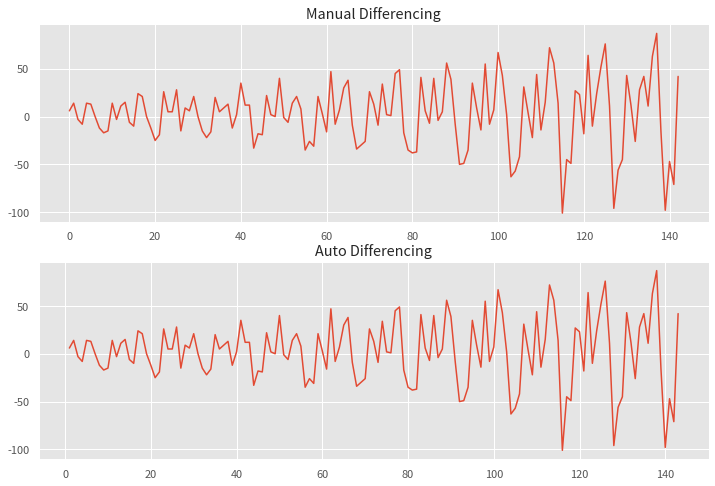

In [ ]:
plt.subplot(211)
plt.title('Manual Differencing')
plt.plot(difference(passengers.Passengers))
plt.subplot(212)
plt.title('Auto Differencing')
plt.plot(passengers.Passengers.diff())

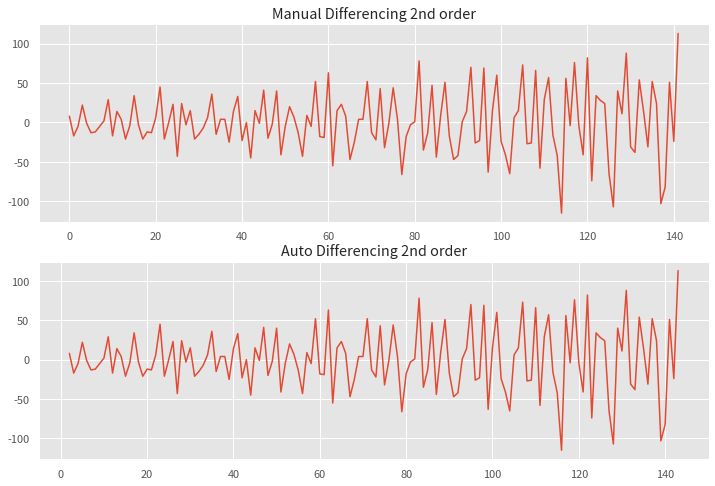

In [ ]:
# If we reduce the trend and seasonality compltely, then we can use diff() repeatedly

plt.subplot(211)
plt.title('Manual Differencing 2nd order')
plt.plot(difference(passengers.Passengers,order = 2))
plt.subplot(212)
plt.title('Auto Differencing 2nd order')
plt.plot(passengers.Passengers.diff().diff())

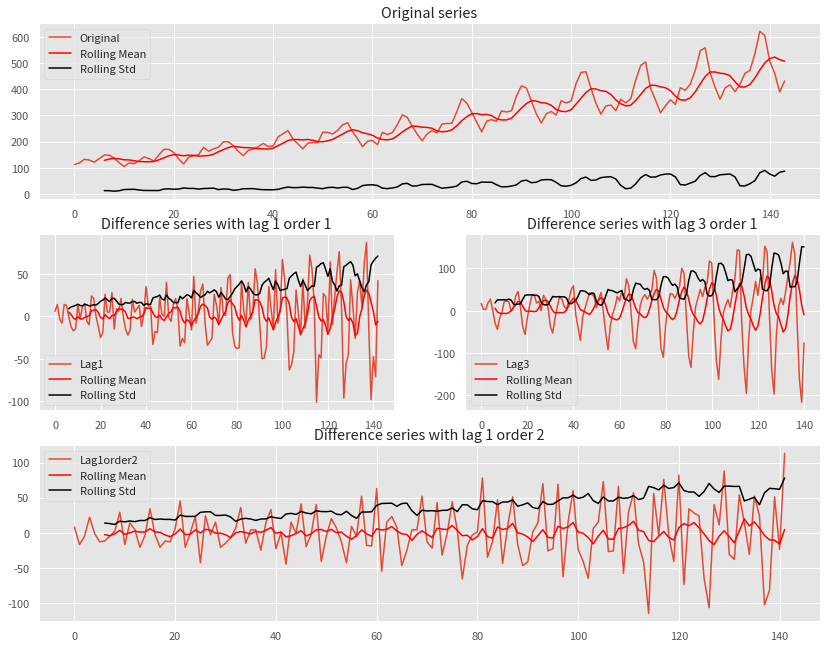

In [ ]:
lag1series = pd.Series(difference(passengers.Passengers, interval=1, order=1))
lag3series = pd.Series(difference(passengers.Passengers, interval=3, order=1))
lag1order2series = pd.Series(difference(
    passengers.Passengers, interval=1, order=2))

fig = plt.figure(figsize=(14, 11))
layout = (3, 2)
original = plt.subplot2grid(layout, (0, 0), colspan=2)
lag1 = plt.subplot2grid(layout, (1, 0))
lag3 = plt.subplot2grid(layout, (1, 1))
lag1order2 = plt.subplot2grid(layout, (2, 0), colspan=2)

original.set_title('Original series')
original.plot(passengers.Passengers, label='Original')
original.plot(passengers.Passengers.rolling(
    7).mean(), color='red', label='Rolling Mean')
original.plot(passengers.Passengers.rolling(7).std(),
              color='black', label='Rolling Std')
original.legend(loc='best')

lag1.set_title('Difference series with lag 1 order 1')
lag1.plot(lag1series, label="Lag1")
lag1.plot(lag1series.rolling(7).mean(), color='red', label='Rolling Mean')
lag1.plot(lag1series.rolling(7).std(), color='black', label='Rolling Std')
lag1.legend(loc='best')

lag3.set_title('Difference series with lag 3 order 1')
lag3.plot(lag3series, label="Lag3")
lag3.plot(lag3series.rolling(7).mean(), color='red', label='Rolling Mean')
lag3.plot(lag3series.rolling(7).std(), color='black', label='Rolling Std')
lag3.legend(loc='best')

lag1order2.set_title('Difference series with lag 1 order 2')
lag1order2.plot(lag1order2series, label="Lag1order2")
lag1order2.plot(lag1order2series.rolling(7).mean(),
                color='red', label='Rolling Mean')
lag1order2.plot(lag1order2series.rolling(7).std(),
                color='black', label='Rolling Std')
lag1order2.legend(loc='best')

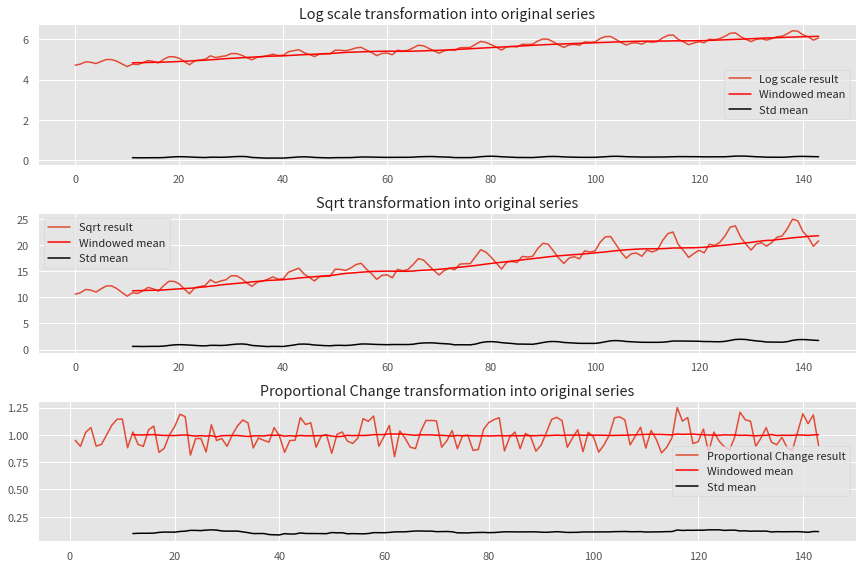

In [ ]:
# Log / Sqrt / Pct scale transformation

plt.subplot(311)
ts_log = np.log(passengers.Passengers)
ts_log.plot(label='Log scale result')
ts_log.rolling(window=12).mean().plot(color='red', label='Windowed mean')
ts_log.rolling(window=12).std().plot(color='black', label='Std mean')
plt.legend()
plt.title('Log scale transformation into original series')


plt.subplot(312)
ts_sqrt = np.sqrt(passengers.Passengers)
ts_sqrt.plot(label='Sqrt result')
ts_sqrt.rolling(window=12).mean().plot(color='red', label='Windowed mean')
ts_sqrt.rolling(window=12).std().plot(color='black', label='Std mean')
plt.legend()
plt.title('Sqrt transformation into original series')

plt.subplot(313)
ts_pct = passengers.Passengers.shift(1)/passengers.Passengers
ts_pct.plot(label='Proportional Change result')
ts_pct.rolling(window=12).mean().plot(color='red', label='Windowed mean')
ts_pct.rolling(window=12).std().plot(color='black', label='Std mean')
plt.legend()
plt.title('Proportional Change transformation into original series')

plt.tight_layout()

#### Smoothing

移动平均就是一个很常见的Smoothing方法，我们也可以用于移除Seasonality

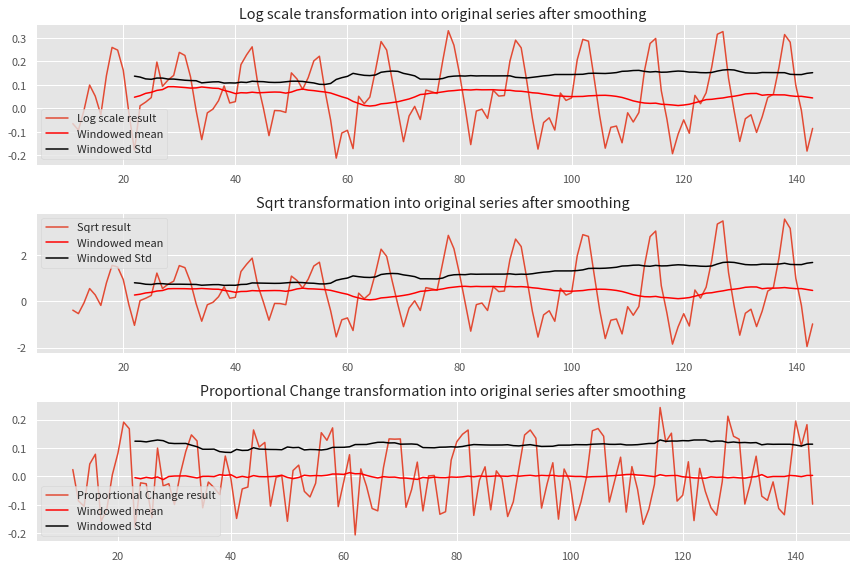

In [ ]:
plt.subplot(311)
ts_log = np.log(passengers.Passengers)
ts_log = ts_log - pd.Series(ts_log).rolling(12).mean()
ts_log.plot(label='Log scale result')
ts_log.rolling(window=12).mean().plot(color='red', label='Windowed mean')
ts_log.rolling(window=12).std().plot(color='black', label='Windowed Std')
plt.legend()
plt.title('Log scale transformation into original series after smoothing')


plt.subplot(312)
ts_sqrt = np.sqrt(passengers.Passengers)
ts_sqrt = ts_sqrt - pd.Series(ts_sqrt).rolling(12).mean()
ts_sqrt.plot(label='Sqrt result')
ts_sqrt.rolling(window=12).mean().plot(color='red', label='Windowed mean')
ts_sqrt.rolling(window=12).std().plot(color='black', label='Windowed Std')
plt.legend()
plt.title('Sqrt transformation into original series after smoothing')

plt.subplot(313)
ts_pct = passengers.Passengers.shift(1)/passengers.Passengers
ts_pct = ts_pct - pd.Series(ts_pct).rolling(12).mean()
ts_pct.plot(label='Proportional Change result')
ts_pct.rolling(window=12).mean().plot(color='red', label='Windowed mean')
ts_pct.rolling(window=12).std().plot(color='black', label='Windowed Std')
plt.legend()
plt.title('Proportional Change transformation into original series after smoothing')

plt.tight_layout()

### **第五阶段：时间序列建模预测**

In [ ]:
split_date = '2022-01-01'
df_train = ts_confirmed_US_incre.loc[ts_confirmed_US_incre.index < split_date]
df_test = ts_confirmed_US_incre.loc[ts_confirmed_US_incre.index >= split_date]
print(f"{len(df_train)} days of training data \n {len(df_test)} days of testing data ")

710 days of training data 
 433 days of testing data 


In [ ]:
resultsDict = {}
predictionsDict = {}

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

EPSILON = 1e-10


def _error(actual: np.ndarray, predicted: np.ndarray):
    """Simple error"""
    return actual - predicted


def _percentage_error(actual: np.ndarray, predicted: np.ndarray):
    """
    Percentage error

    Note: result is NOT multiplied by 100
    """
    return _error(actual, predicted) / (actual + EPSILON)


def _naive_forecasting(actual: np.ndarray, seasonality: int = 1):
    """Naive forecasting method which just repeats previous samples"""
    return actual[:-seasonality]


def _relative_error(
    actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None
):
    """Relative Error"""
    if benchmark is None or isinstance(benchmark, int):
        # If no benchmark prediction provided - use naive forecasting
        if not isinstance(benchmark, int):
            seasonality = 1
        else:
            seasonality = benchmark
        return _error(actual[seasonality:], predicted[seasonality:]) / (
            _error(actual[seasonality:], _naive_forecasting(actual, seasonality))
            + EPSILON
        )

    return _error(actual, predicted) / (_error(actual, benchmark) + EPSILON)


def _bounded_relative_error(
    actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None
):
    """Bounded Relative Error"""
    if benchmark is None or isinstance(benchmark, int):
        # If no benchmark prediction provided - use naive forecasting
        if not isinstance(benchmark, int):
            seasonality = 1
        else:
            seasonality = benchmark

        abs_err = np.abs(_error(actual[seasonality:], predicted[seasonality:]))
        abs_err_bench = np.abs(
            _error(actual[seasonality:], _naive_forecasting(actual, seasonality))
        )
    else:
        abs_err = np.abs(_error(actual, predicted))
        abs_err_bench = np.abs(_error(actual, benchmark))

    return abs_err / (abs_err + abs_err_bench + EPSILON)


def _geometric_mean(a, axis=0, dtype=None):
    """Geometric mean"""
    if not isinstance(a, np.ndarray):  # if not an ndarray object attempt to convert it
        log_a = np.log(np.array(a, dtype=dtype))
    elif dtype:  # Must change the default dtype allowing array type
        if isinstance(a, np.ma.MaskedArray):
            log_a = np.log(np.ma.asarray(a, dtype=dtype))
        else:
            log_a = np.log(np.asarray(a, dtype=dtype))
    else:
        log_a = np.log(a)
    return np.exp(log_a.mean(axis=axis))


def mse(actual: np.ndarray, predicted: np.ndarray):
    """Mean Squared Error"""
    return np.mean(np.square(_error(actual, predicted)))


def rmse(actual: np.ndarray, predicted: np.ndarray):
    """Root Mean Squared Error"""
    return np.sqrt(mse(actual, predicted))


def nrmse(actual: np.ndarray, predicted: np.ndarray):
    """Normalized Root Mean Squared Error"""
    return rmse(actual, predicted) / (actual.max() - actual.min())


def me(actual: np.ndarray, predicted: np.ndarray):
    """Mean Error"""
    return np.mean(_error(actual, predicted))


def mae(actual: np.ndarray, predicted: np.ndarray):
    """Mean Absolute Error"""
    return np.mean(np.abs(_error(actual, predicted)))


mad = mae  # Mean Absolute Deviation (it is the same as MAE)


def gmae(actual: np.ndarray, predicted: np.ndarray):
    """Geometric Mean Absolute Error"""
    return _geometric_mean(np.abs(_error(actual, predicted)))


def mdae(actual: np.ndarray, predicted: np.ndarray):
    """Median Absolute Error"""
    return np.median(np.abs(_error(actual, predicted)))


def mpe(actual: np.ndarray, predicted: np.ndarray):
    """Mean Percentage Error"""
    return np.mean(_percentage_error(actual, predicted))


def mape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Absolute Percentage Error

    Properties:
        + Easy to interpret
        + Scale independent
        - Biased, not symmetric
        - Undefined when actual[t] == 0

    Note: result is NOT multiplied by 100
    """
    return np.mean(np.abs(_percentage_error(actual, predicted)))


def mdape(actual: np.ndarray, predicted: np.ndarray):
    """
    Median Absolute Percentage Error

    Note: result is NOT multiplied by 100
    """
    return np.median(np.abs(_percentage_error(actual, predicted)))


def smape(actual: np.ndarray, predicted: np.ndarray):
    """
    Symmetric Mean Absolute Percentage Error

    Note: result is NOT multiplied by 100
    """
    return np.mean(
        2.0
        * np.abs(actual - predicted)
        / ((np.abs(actual) + np.abs(predicted)) + EPSILON)
    )


def smdape(actual: np.ndarray, predicted: np.ndarray):
    """
    Symmetric Median Absolute Percentage Error

    Note: result is NOT multiplied by 100
    """
    return np.median(
        2.0
        * np.abs(actual - predicted)
        / ((np.abs(actual) + np.abs(predicted)) + EPSILON)
    )


def maape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Arctangent Absolute Percentage Error

    Note: result is NOT multiplied by 100
    """
    return np.mean(np.arctan(np.abs((actual - predicted) / (actual + EPSILON))))


def mase(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 1):
    """
    Mean Absolute Scaled Error

    Baseline (benchmark) is computed with naive forecasting (shifted by @seasonality)
    """
    return mae(actual, predicted) / mae(
        actual[seasonality:], _naive_forecasting(actual, seasonality)
    )


def std_ae(actual: np.ndarray, predicted: np.ndarray):
    """Normalized Absolute Error"""
    __mae = mae(actual, predicted)
    return np.sqrt(
        np.sum(np.square(_error(actual, predicted) - __mae)) / (len(actual) - 1)
    )


def std_ape(actual: np.ndarray, predicted: np.ndarray):
    """Normalized Absolute Percentage Error"""
    __mape = mape(actual, predicted)
    return np.sqrt(
        np.sum(np.square(_percentage_error(actual, predicted) - __mape))
        / (len(actual) - 1)
    )


def rmspe(actual: np.ndarray, predicted: np.ndarray):
    """
    Root Mean Squared Percentage Error

    Note: result is NOT multiplied by 100
    """
    return np.sqrt(np.mean(np.square(_percentage_error(actual, predicted))))


def rmdspe(actual: np.ndarray, predicted: np.ndarray):
    """
    Root Median Squared Percentage Error

    Note: result is NOT multiplied by 100
    """
    return np.sqrt(np.median(np.square(_percentage_error(actual, predicted))))


def rmsse(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 1):
    """Root Mean Squared Scaled Error"""
    q = np.abs(_error(actual, predicted)) / mae(
        actual[seasonality:], _naive_forecasting(actual, seasonality)
    )
    return np.sqrt(np.mean(np.square(q)))


def inrse(actual: np.ndarray, predicted: np.ndarray):
    """Integral Normalized Root Squared Error"""
    return np.sqrt(
        np.sum(np.square(_error(actual, predicted)))
        / np.sum(np.square(actual - np.mean(actual)))
    )


def rrse(actual: np.ndarray, predicted: np.ndarray):
    """Root Relative Squared Error"""
    return np.sqrt(
        np.sum(np.square(actual - predicted))
        / np.sum(np.square(actual - np.mean(actual)))
    )


def mre(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Mean Relative Error"""
    return np.mean(_relative_error(actual, predicted, benchmark))


def rae(actual: np.ndarray, predicted: np.ndarray):
    """Relative Absolute Error (aka Approximation Error)"""
    return np.sum(np.abs(actual - predicted)) / (
        np.sum(np.abs(actual - np.mean(actual))) + EPSILON
    )


def mrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Mean Relative Absolute Error"""
    return np.mean(np.abs(_relative_error(actual, predicted, benchmark)))


def mdrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Median Relative Absolute Error"""
    return np.median(np.abs(_relative_error(actual, predicted, benchmark)))


def gmrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Geometric Mean Relative Absolute Error"""
    return _geometric_mean(np.abs(_relative_error(actual, predicted, benchmark)))


def mbrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Mean Bounded Relative Absolute Error"""
    return np.mean(_bounded_relative_error(actual, predicted, benchmark))


def umbrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Unscaled Mean Bounded Relative Absolute Error"""
    __mbrae = mbrae(actual, predicted, benchmark)
    return __mbrae / (1 - __mbrae)


def mda(actual: np.ndarray, predicted: np.ndarray):
    """Mean Directional Accuracy"""
    return np.mean(
        (
            np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])
        ).astype(int)
    )


def bias(actual: np.ndarray, predicted: np.ndarray):
    """Mean forecast error(or Forecast Bias)"""
    return np.mean(actual - predicted)


METRICS = {
    "mse": mse,
    "rmse": rmse,
    "nrmse": nrmse,
    "me": me,
    "mae": mae,
    "mad": mad,
    "gmae": gmae,
    "mdae": mdae,
    "mpe": mpe,
    "mape": mape,
    "mdape": mdape,
    "smape": smape,
    "smdape": smdape,
    "maape": maape,
    "mase": mase,
    "std_ae": std_ae,
    "std_ape": std_ape,
    "rmspe": rmspe,
    "rmdspe": rmdspe,
    "rmsse": rmsse,
    "inrse": inrse,
    "rrse": rrse,
    "mre": mre,
    "rae": rae,
    "mrae": mrae,
    "mdrae": mdrae,
    "gmrae": gmrae,
    "mbrae": mbrae,
    "umbrae": umbrae,
    "mda": mda,
    "bias": bias,
    "r2": r2_score,
}


def evaluate(
    actual: np.ndarray, predicted: np.ndarray, metrics=("mae", "rmse", "mape", "r2")
):
    results = {}
    for name in metrics:
        try:
            results[name] = METRICS[name](actual, predicted)
        except Exception as err:
            results[name] = np.nan
            print("Unable to compute metric {0}: {1}".format(name, err))
    return results


def evaluate_all(actual: np.ndarray, predicted: np.ndarray):
    return evaluate(actual, predicted, metrics=set(METRICS.keys()))

In [ ]:
mean = df_train['New York'].mean()
mean = np.array([mean for u in range(len(df_test))])
resultsDict['Naive mean'] = evaluate(df_test['New York'], mean)
predictionsDict['Naive mean'] = mean
resultsDict['Yesterdays value'] = evaluate(
    df_test['New York'], df_test['New York'].shift(1).fillna(0))
predictionsDict['Yesterdays value'] = df_test['New York'].shift(1).fillna(0).values

In [ ]:
!pip install pmdarima
!pip install rich

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.3 MB/s eta 0:00:00
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [ ]:
import warnings

import matplotlib as mpl
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import statsmodels as sm
import tensorflow as tf
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import pickle
import warnings
from math import sqrt

import lightgbm as lgb
import matplotlib as mpl
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import pmdarima as pm
import tensorflow as tf
import xgboost as xgb

from sklearn import linear_model, svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.ar_model import AutoReg

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from rich.progress import track

# We will use deprecated models of statmodels which throw a lot of warnings to use more modern ones
warnings.filterwarnings("ignore")


# Extra settings
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
rcParams['figure.figsize'] = 18, 8
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

# change text color
import colorama
from colorama import Fore, Style

print(tf.__version__)

2.11.0


### **Univariate Forecasting**

#### **Simple Exponential Smoothing (SES)**

In [ ]:
# Walk throught the test data, training and predicting 1 day ahead for all the test data

index = len(df_train)                          
yhat = list()                                  
for t in track(range(len(df_test['New York']))):     
    temp_train = ts_confirmed_US_incre[:len(df_train)+t]
    model = SimpleExpSmoothing(temp_train['New York'])   
    model_fit = model.fit()                             
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train))  
    yhat = yhat + [predictions]    # predictions加到 yhat中

yhat_SES = pd.concat(yhat)      
resultsDict['SES'] = evaluate(df_test['New York'], yhat_SES.values)
predictionsDict['SES'] = yhat_SES.values

Output()

##### **Holt Winter’s Exponential Smoothing (HWES)**

In [ ]:
# Walk throught the test data, training and predicting 1 day ahead for all the test data
index = len(df_train)
yhat = list()
for t in track(range(len(df_test['New York']))):
    temp_train = ts_confirmed_US_incre[:len(df_train)+t]
    model = ExponentialSmoothing(temp_train['New York'])
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train))
    yhat = yhat + [predictions]

yhat_HWES = pd.concat(yhat)
resultsDict['HWES'] = evaluate(df_test['New York'], yhat_HWES.values)
predictionsDict['HWES'] = yhat_HWES.values

Output()

#### **Autoregression (AR)**

In [ ]:
# Walk throught the test data, training and predicting 1 day ahead for all the test data
index = len(df_train)
yhat = list()
for t in track(range(len(df_test['New York']))):
    temp_train = ts_confirmed_US_incre[:len(df_train)+t]
    model = AutoReg(temp_train['New York'],lags = None)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train))
    yhat = yhat + [predictions]

yhat_AR = pd.concat(yhat)
resultsDict['AR'] = evaluate(df_test['New York'], yhat_AR.values)
predictionsDict['AR'] = yhat_AR.values

Output()

#### **Moving Average (MA)**

In [ ]:
# Walk throught the test data, training and predicting 1 day ahead for all the test data
index = len(df_train)
yhat = list()
for t in track(range(len(df_test['New York']))):
    temp_train = ts_confirmed_US_incre[:len(df_train)+t]
    model = ARIMA(temp_train['New York'],order=(0,0,1))
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train))
    yhat = yhat + [predictions]

yhat_MA = pd.concat(yhat)
resultsDict['MA'] = evaluate(df_test['New York'], yhat_MA.values)
predictionsDict['MA'] = yhat_MA.values

Output()

#### **Autoregressive Moving Average (ARMA)**

In [ ]:
# Walk throught the test data, training and predicting 1 day ahead for all the test data
index = len(df_train)
yhat = list()
for t in track(range(len(df_test['New York']))):
    temp_train = ts_confirmed_US_incre[:len(df_train)+t]
    model = ARIMA(temp_train['New York'].diff().fillna(0),order=(1,1,0))
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train))
    yhat = yhat + [predictions]

yhat_ARMA = pd.concat(yhat)
resultsDict['ARMA'] = evaluate(df_test['New York'], yhat_ARMA.values)
predictionsDict['ARMA'] = yhat_ARMA.values

Output()

#### **Autoregressive integrated moving average (ARIMA)**

In [ ]:
# Walk throught the test data, training and predicting 1 day ahead for all the test data
# Walk throught the test data, training and predicting 1 day ahead for all the test data
index = len(df_train)
yhat = list()
for t in track(range(len(df_test['New York']))):
    temp_train = ts_confirmed_US_incre[:len(df_train)+t]
    model = ARIMA(temp_train['New York'],order=(1,0,0))
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train))
    yhat = yhat + [predictions]

yhat_ARIMA = pd.concat(yhat)
resultsDict['ARIMA'] = evaluate(df_test['New York'], yhat_ARIMA.values)
predictionsDict['ARIMA'] = yhat_ARIMA.values

Output()

#### **Auto ARIMA**

In [ ]:
autoModel = pm.auto_arima(df_train['New York'], trace=True,
                          error_action='ignore', suppress_warnings=True, seasonal=True)
# autoModel.plot_diagnostics(figsize=(14,10))
# plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=13347.733, Time=0.99 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=14640.016, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=14145.272, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=13346.430, Time=0.93 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=13363.877, Time=0.47 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=13562.254, Time=0.86 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=13364.415, Time=1.49 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=13346.874, Time=1.99 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=13433.366, Time=1.42 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=13332.877, Time=1.73 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=13340.164, Time=0.91 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=13337.783, Time=1.98 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=inf, Time=1.69 sec
 ARIMA(3,2,2)(0,0,0)[0]        

#### **Seasonal Autoregressive Integrated Moving-Average (SARIMA)**

In [ ]:
best_order = autoModel.order
model0 = ARIMA(df_train['New York'],order = best_order)
model_fit0 =model0.fit()
yhat = list()
for t in track(range(len(df_test['New York']))):
    temp_train = ts_confirmed_US_incre[:len(df_train)+t]
    model = ARIMA(temp_train['New York'],order = best_order)
    model_fit = model.fit(start_params = model_fit0.params)
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train),dynamic=False)
    yhat = yhat + [predictions]
yhat_autoarima = pd.concat(yhat)
resultsDict['AutoARIMA {0}'.format(best_order)] = evaluate(
    df_test['New York'], yhat_autoarima)
predictionsDict['AutoARIMA {0}'.format(best_order)] = yhat_autoarima.values

Output()

#### **Auto - SARIMA**

In [ ]:
# Walk throught the test data, training and predicting 1 day ahead for all the test data
index = len(df_train)
yhat = list()
for t in track(range(len(df_test['New York']))):
    temp_train = ts_confirmed_US_incre[:len(df_train)+t]
    model = SARIMAX(temp_train['New York'],order=(
        1, 0, 0), seasonal_order=(0, 0, 0, 3))
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train),dynamic=False)
    yhat = yhat + [predictions]
    
yhat_SARIMAX = pd.concat(yhat)
resultsDict['SARIMAX'] = evaluate(df_test['New York'], yhat_SARIMAX.values)
predictionsDict['SARIMAX'] = yhat_SARIMAX.values

Output()

In [ ]:
# building the model
autoModel = pm.auto_arima(df_train['New York'], trace=True, error_action='ignore',
                          suppress_warnings=True, seasonal=True, m=6, stepwise=True)
# autoModel.plot_diagnostics(figsize=(14,10))
# plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[6]             : AIC=13313.882, Time=3.28 sec
 ARIMA(0,2,0)(0,0,0)[6]             : AIC=14640.016, Time=0.08 sec
 ARIMA(1,2,0)(1,0,0)[6]             : AIC=14146.943, Time=0.42 sec
 ARIMA(0,2,1)(0,0,1)[6]             : AIC=inf, Time=1.64 sec
 ARIMA(2,2,2)(0,0,1)[6]             : AIC=13327.855, Time=2.40 sec
 ARIMA(2,2,2)(1,0,0)[6]             : AIC=13366.697, Time=0.85 sec
 ARIMA(2,2,2)(2,0,1)[6]             : AIC=13316.815, Time=3.74 sec
 ARIMA(2,2,2)(1,0,2)[6]             : AIC=13319.200, Time=6.09 sec
 ARIMA(2,2,2)(0,0,0)[6]             : AIC=13347.733, Time=1.36 sec
 ARIMA(2,2,2)(0,0,2)[6]             : AIC=13316.638, Time=3.44 sec
 ARIMA(2,2,2)(2,0,0)[6]             : AIC=13363.630, Time=1.71 sec
 ARIMA(2,2,2)(2,0,2)[6]             : AIC=13356.202, Time=6.00 sec
 ARIMA(1,2,2)(1,0,1)[6]             : AIC=inf, Time=3.94 sec
 ARIMA(2,2,1)(1,0,1)[6]             : AIC=13411.958, Time=2.34 sec
 ARIMA(3,2,2)(1,0,1)[6]        

In [ ]:
best_order = autoModel.order
seasonalOrder = autoModel.seasonal_order
# model0 = ARIMA(df_train['New York'],order = best_order)
# model_fit0 =model0.fit(disp=False)
yhat = list()
for t in track(range(len(df_test['New York']))):
    temp_train = ts_confirmed_US_incre[:len(df_train)+t]
    model = SARIMAX(temp_train['New York'],
                    order = best_order,
                   seasonal_order=seasonalOrder)
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train),dynamic=False)
    yhat = yhat + [predictions]
yhat_AutoSARIMAX = pd.concat(yhat)
resultsDict['AutoSARIMAX  {0}'.format(best_order,seasonalOrder)] = evaluate(
    df_test['New York'], yhat_AutoSARIMAX)
predictionsDict['AutoSARIMAX  {0}'.format(best_order,seasonalOrder)] = yhat_AutoSARIMAX.values

Output()

In [ ]:
yhat_dict = {
    'SES':yhat_SES,
    'HWES':yhat_HWES,
    'AR':yhat_AR,
    'MA':yhat_MA,
    'ARMA':yhat_ARMA,
    'ARIMA':yhat_ARIMA,
    'AUTOARIMA':yhat_autoarima,
    'SARIMAX':yhat_SARIMAX,
    'AUTOSARIMAX':yhat_AutoSARIMAX
}

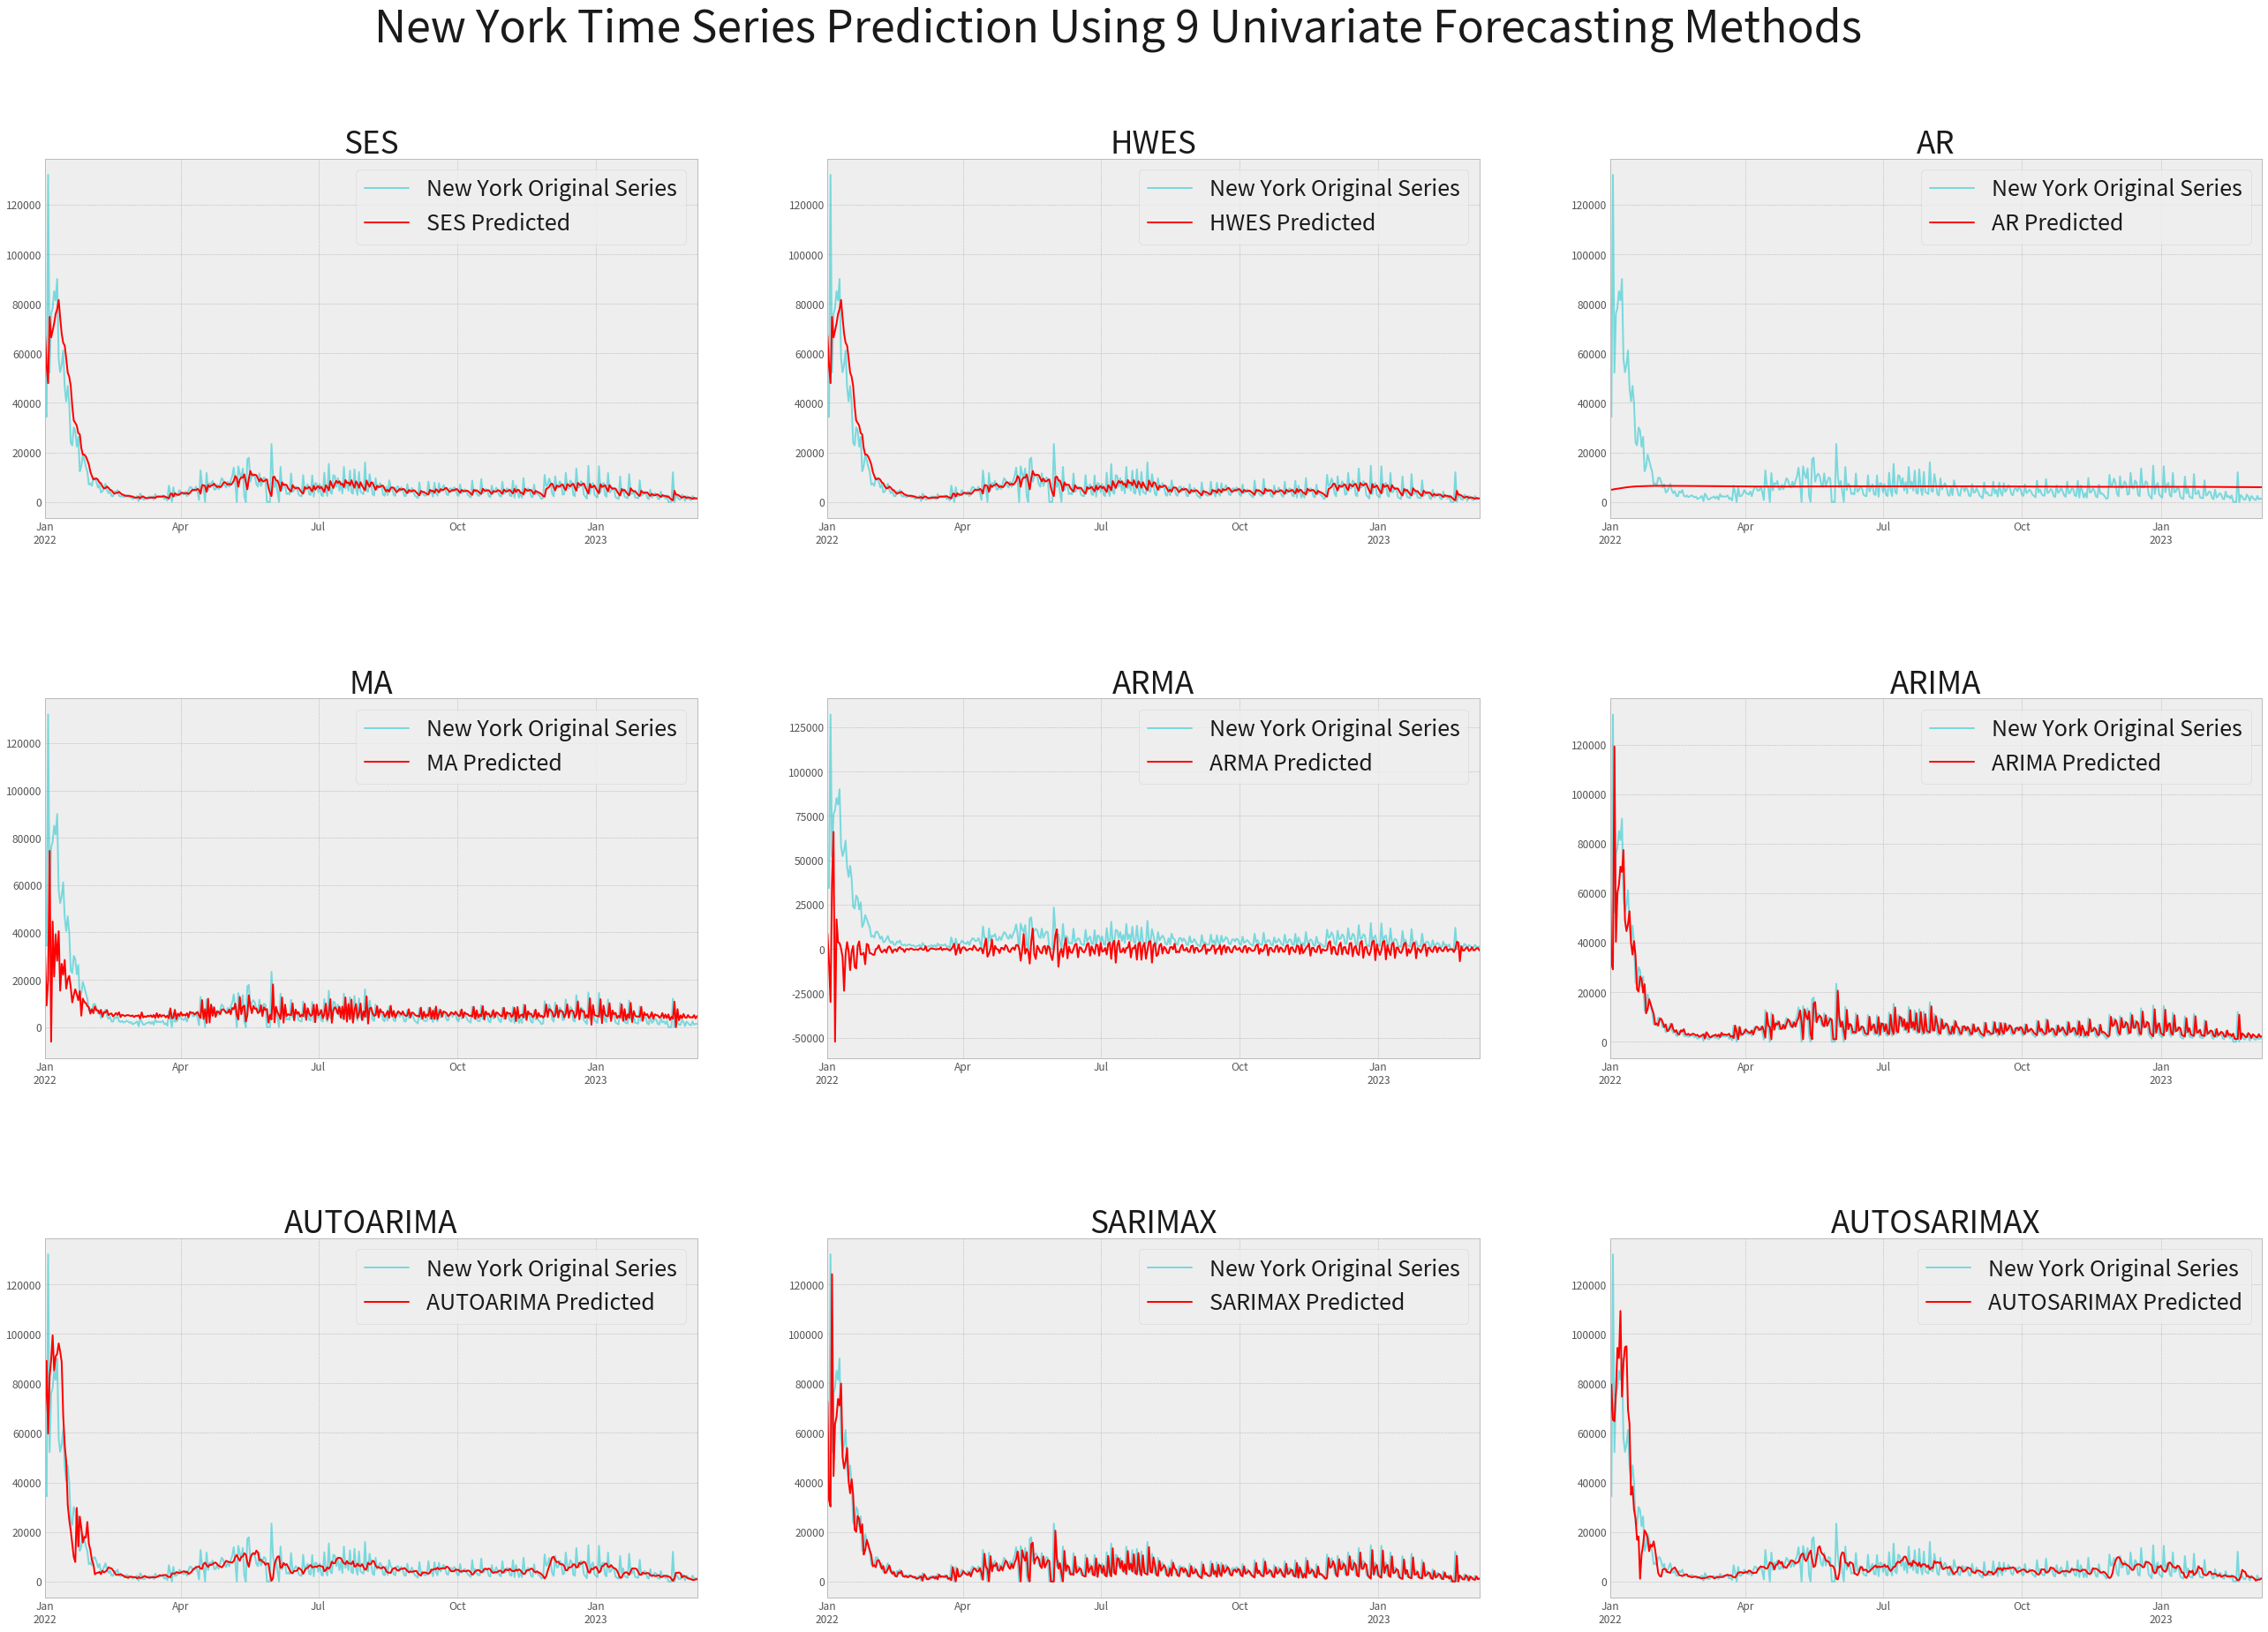

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(3*15, 10*3))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("New York Time Series Prediction Using 9 Univariate Forecasting Methods", fontsize=50, y = .96)
for yhat_key,ax in zip(yhat_dict.keys(), axs.ravel()):
    df_test['New York'].plot(ax=ax,alpha = .5, label = "New York Original Series", color = '#06c3cc')
    yhat_dict[yhat_key].plot(ax=ax,color = 'red',label=f'{yhat_key} Predicted')
    ax.set_title(f"{yhat_key.upper()}",fontsize = 35)
    ax.legend(fontsize = 25)
    ax.set_xlabel("")
plt.show()

### **第六阶段：时间序列建模预测**

#### **Multivariate time series forecasting**

In [ ]:
def gen_time_feat(df, target=None):
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['sin_day'] = np.sin(df['dayofyear'])
    df['cos_day'] = np.cos(df['dayofyear'])
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    X = df.drop(['date'], axis=1)
    if target:
        y = df[target]
        X = X.drop([target], axis=1)
        return X, y

    return X

In [ ]:
X_train_df, y_train = gen_time_feat(df_train, target='New York')
X_test_df, y_test = gen_time_feat(df_test, target='New York')

In [ ]:
# Standardization

scaler = StandardScaler()
scaler.fit(X_train_df)
X_train = scaler.transform(X_train_df)
X_test = scaler.transform(X_test_df)
X_train_df = pd.DataFrame(X_train, columns=X_train_df.columns)
X_test_df = pd.DataFrame(X_test, columns=X_test_df.columns)

#### **Bayesian regression**

In [ ]:
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
yhat_BayesianRidge = reg.predict(X_test)
resultsDict['BayesianRidge'] = evaluate(df_test['New York'], yhat_BayesianRidge)
predictionsDict['BayesianRidge'] = yhat_BayesianRidge

#### **LARS Lasso**

In [ ]:
reg = linear_model.LassoLars(alpha=0.1)
reg.fit(X_train, y_train)
yhat_LassoLars = reg.predict(X_test)
resultsDict['LassoLars'] = evaluate(df_test['New York'], yhat_LassoLars)
predictionsDict['LassoLars'] = yhat_LassoLars

#### **Automatic Relevance Determination Regression (ARD)**

In [ ]:
reg = linear_model.ARDRegression(compute_score=True)
reg.fit(X_train, y_train)
yhat_ARDRegression = reg.predict(X_test)
resultsDict['ARDRegression'] = evaluate(df_test['New York'], yhat_ARDRegression)
predictionsDict['ARDRegression'] = yhat_ARDRegression

#### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=2, random_state=0)
reg.fit(X_train, y_train)
yhat_DecisionTree = reg.predict(X_test)
resultsDict['DecisionTree'] = evaluate(df_test['New York'], yhat_DecisionTree)
predictionsDict['DecisionTree'] = yhat_DecisionTree

#### **Randomforest**

In [ ]:
reg = RandomForestRegressor(max_depth=2, random_state=0)
reg.fit(X_train, y_train)
yhat_RandomForest = reg.predict(X_test)
resultsDict['Randomforest'] = evaluate(df_test['New York'],yhat_RandomForest)
predictionsDict['Randomforest'] = yhat_RandomForest

#### **Adaboost**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

reg = AdaBoostRegressor(random_state=0, n_estimators=100)
reg.fit(X_train, y_train)
yhat_AdaBoost = reg.predict(X_test)
resultsDict['AdaBoost'] = evaluate(df_test['New York'],yhat_AdaBoost)
predictionsDict['AdaBoost'] = yhat_AdaBoost

#### **XGBoost**

In [ ]:
reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
reg.fit(X_train, y_train,
        verbose=False)  # Change verbose to True if you want to see it train
yhat_XGBoost = reg.predict(X_test)
resultsDict['XGBoost'] = evaluate(df_test['New York'], yhat_XGBoost)
predictionsDict['XGBoost'] = yhat_XGBoost

#### **Lightgbm**

In [ ]:
lightGBM = lgb.LGBMRegressor()
lightGBM.fit(X_train, y_train)
yhat_lightGBM = lightGBM.predict(X_test)
resultsDict['Lightgbm'] = evaluate(df_test['New York'], yhat_lightGBM)
predictionsDict['Lightgbm'] = yhat_lightGBM

#### **Support Vector Regressor**

In [ ]:
reg = svm.SVR()
reg.fit(X_train, y_train)
yhat_SVR = reg.predict(X_test)
resultsDict['SVM RBF'] = evaluate(df_test['New York'], yhat_SVR)
predictionsDict['SVM RBF'] = yhat_SVR

#### **Nearest neighbors**

In [ ]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
yhat_KNN = reg.predict(X_test)
resultsDict['KNN'] = evaluate(df_test['New York'], yhat_KNN)
predictionsDict['KNN'] = yhat_KNN

#### **Deep Learning**

In [ ]:
# For our dl model we will create windows of data that will be feeded into the datasets, for each timestemp T we will append the data from T-7 to T to the Xdata with target Y(t)
BATCH_SIZE = 32
BUFFER_SIZE = 64
WINDOW_LENGTH = 12


def window_data(X, Y, window=7):
    
    x = []
    y = []
    for i in range(window-1, len(X)):
        x.append(X[i-window+1:i+1])
        y.append(Y[i])
    return np.array(x), np.array(y)


# Since we are doing sliding, we need to join the datasets again of train and test
X_w = np.concatenate((X_train, X_test))
y_w = np.concatenate((y_train, y_test))

X_w, y_w = window_data(X_w, y_w, window=WINDOW_LENGTH)
X_train_w = X_w[:-len(X_test)]
y_train_w = y_w[:-len(X_test)]
X_test_w = X_w[-len(X_test):]
y_test_w = y_w[-len(X_test):]

# Check we will have same test set as in the previous models, make sure we didnt screw up on the windowing
print(f"Test set equal: {np.array_equal(y_test_w,y_test)}")

train_data = tf.data.Dataset.from_tensor_slices((X_train_w, y_train_w))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((X_test_w, y_test_w))
val_data = val_data.batch(BATCH_SIZE).repeat()

Test set equal: True


In [ ]:
dropout = 0.0
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(
        128, input_shape=X_train_w.shape[-2:], dropout=dropout),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
])

lstm_model.compile(optimizer='rmsprop', loss='mae')

In [ ]:
EVALUATION_INTERVAL = 200
EPOCHS = 20

model_history = lstm_model.fit(train_data, epochs=EPOCHS,
                                      steps_per_epoch=EVALUATION_INTERVAL,
                                      validation_data=val_data, validation_steps=50)

Epoch 1/20
200/200 [==============================] - 9s 31ms/step - loss: 3002.8164 - val_loss: 5731.4824
Epoch 2/20
200/200 [==============================] - 4s 21ms/step - loss: 1658.6874 - val_loss: 5065.2935
Epoch 3/20
200/200 [==============================] - 4s 21ms/step - loss: 1424.1688 - val_loss: 4704.7422
Epoch 4/20
200/200 [==============================] - 6s 31ms/step - loss: 1294.3972 - val_loss: 4313.5054
Epoch 5/20
200/200 [==============================] - 5s 23ms/step - loss: 1278.6630 - val_loss: 4078.3030
Epoch 6/20
200/200 [==============================] - 5s 24ms/step - loss: 1207.4852 - val_loss: 3900.5454
Epoch 7/20
200/200 [==============================] - 6s 28ms/step - loss: 1159.6970 - val_loss: 3835.1326
Epoch 8/20
200/200 [==============================] - 4s 22ms/step - loss: 1080.1599 - val_loss: 3766.9097
Epoch 9/20
200/200 [==============================] - 6s 29ms/step - loss: 1064.0455 - val_loss: 3630.2917
Epoch 10/20
200/200 [================

In [ ]:
yhat_LSTM = lstm_model.predict(X_test_w).reshape(1, -1)[0]
resultsDict['Tensorflow simple LSTM'] = evaluate(y_test, yhat_LSTM)
predictionsDict['Tensorflow simple LSTM'] = yhat_LSTM

14/14 [==============================] - 1s 9ms/step


In [ ]:
with open('scores.pickle', 'wb') as handle:
    pickle.dump(resultsDict, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('predictions.pickle', 'wb') as handle:
    pickle.dump(predictionsDict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
result_df = pd.DataFrame.from_dict(resultsDict).T
result_df

mae          rmse          mape        r2
Naive mean              5223.664509  13182.630718  1.358467e+12 -0.045595
Yesterdays value        3748.558891   8085.571694  1.104827e+12  0.606648
SES                     3185.882812   6336.717339  1.433454e+12  0.758405
HWES                    3185.882812   6336.717339  1.433454e+12  0.758405
AR                      5518.819569  13082.258039  1.715840e+12 -0.029734
MA                      4698.931990  10180.522235  1.430738e+12  0.376409
ARMA                    7863.751022  16347.812784  5.970741e+11 -0.607973
ARIMA                   3692.915845   7903.150174  1.208260e+12  0.624197
AutoARIMA (2, 2, 3)     3448.227508   7182.540335  1.535107e+12  0.689604
SARIMAX                 3595.963898   7990.340958  9.652399e+11  0.615860
AutoSARIMAX  (2, 2, 2)  3329.545461   6733.777653  1.579976e+12  0.727180
BayesianRidge           5601.020107   9218.796092  1.463539e+12  0.488662
LassoLars               6337.808408  10379.953925  1.615675e+12  0.351738
ARDRegression           5662.176798   9193.163005  1.532492e+12  0.491502
DecisionTree            3770.658673   7383.170895  1.431424e+12  0.672022
Randomforest            3507.424134   6383.956996  1.458820e+12  0.754789
AdaBoost                4120.631362   8904.672676  1.400380e+12  0.522915
XGBoost                 4130.081271   7626.535467  1.556209e+12  0.650044
Lightgbm                4516.399816   8295.603035  1.548567e+12  0.585948
SVM RBF                 5323.963386  13627.540619  8.815193e+11 -0.117363
KNN                     4065.017706   7556.183103  7.128637e+11  0.656470
Tensorflow simple LSTM  3446.456602   6511.370210  1.104007e+12  0.744904

#### **Metrics Comparison**

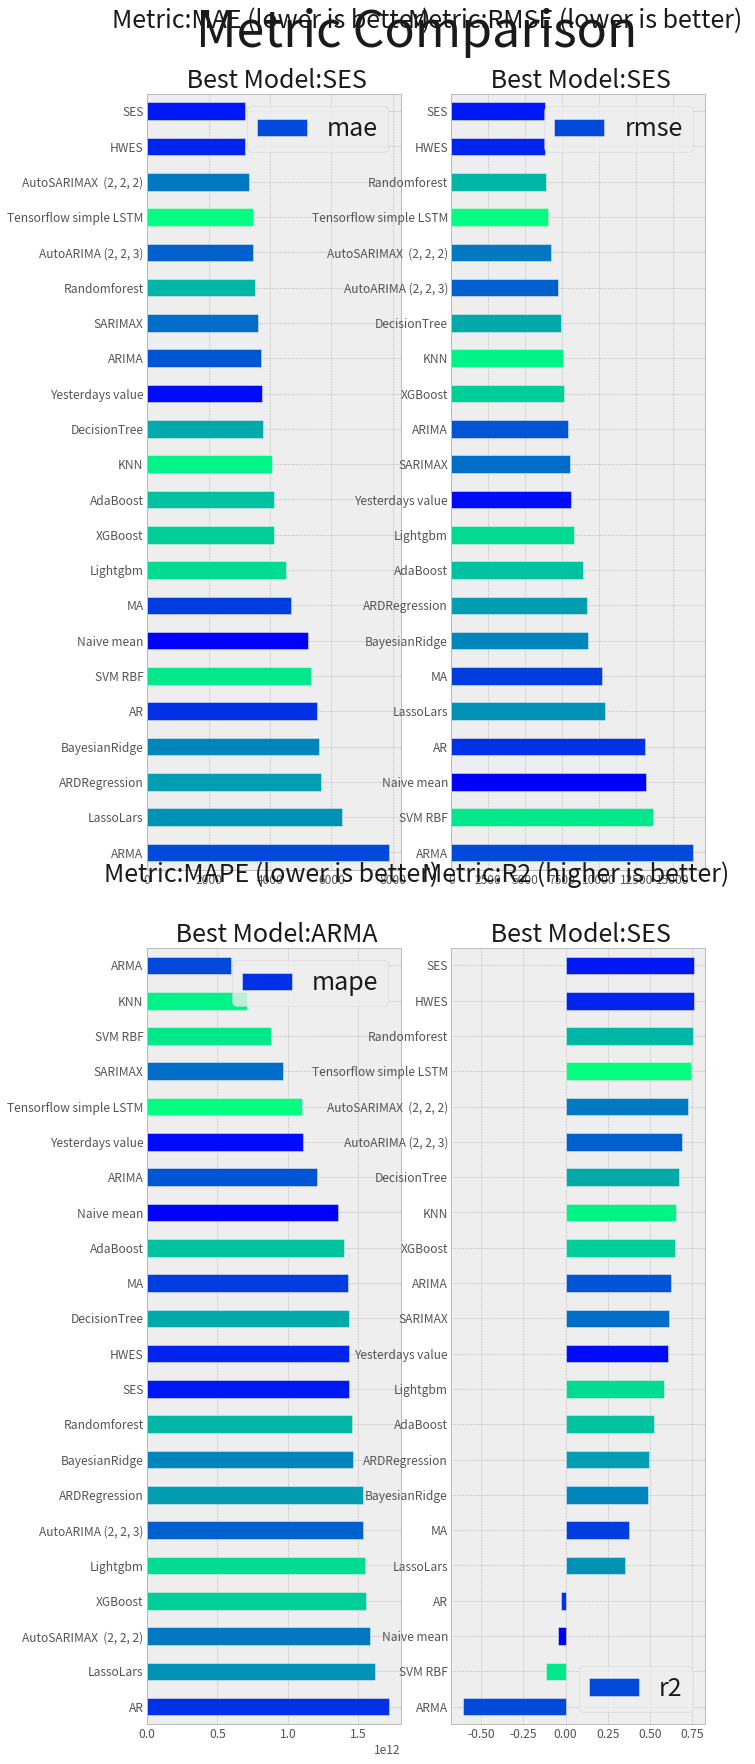

<Figure size 1296x576 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 2*15))
plt.subplots_adjust(hspace=0.1)
plt.suptitle("Metric Comparison", fontsize=50, y = .92)

idx = result_df.index
cols = result_df.columns
pallette = plt.cm.get_cmap("winter", len(idx))
colors = [pallette(x) for x in range(len(idx))]
color_dict = dict(zip(idx, colors))
for metric,ax in zip(result_df.columns, axs.ravel()):
    if metric != 'r2':
        df = result_df[metric].sort_values(ascending=False)
        df.plot(
            ax=ax,
            kind = 'barh',
            colormap="Paired",
            color=[color_dict.get(x, "#ff7f00") for x in df.index],
            label = metric
        )
        ax.set_title(f"Metric:{metric.upper()} (lower is better) \n\n Best Model:{df.index[-1]}",fontsize = 25)

    else:
        df = result_df[metric].sort_values()
        df.plot(
            ax=ax,
            kind = 'barh',
            colormap="Paired",
            color=[color_dict.get(x, "#ff7f00") for x in df.index],
            label = metric
        )
        ax.set_title(f"Metric:{metric.upper()} (higher is better) \n\n Best Model:{df.index[-1]}",fontsize = 25)
        
    ax.legend(fontsize = 25)
    ax.set_xlabel("")
plt.show()
plt.tight_layout()